In [66]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-project-healthcare/Healthcare_dataset.xlsx


In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis, skew
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [68]:
# Load the dataset and Display the first few rows of the dataset
data = pd.read_excel('/kaggle/input/final-project-healthcare/Healthcare_dataset.xlsx')
data.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0  OB/GYN/Others/PCP/Unknown  ...                                   N   
1  OB/GYN/Others/PCP/Unknown  ...                                   N   
2  OB/GYN/Others/PCP/Unknown  ...                                   N   
3  OB/GYN/Others/PCP/Unknown  ...                                   N   
4  OB/GYN/Others/PCP/Unknown  ...                                   N   

  Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                       N                             N   
1                       N                             N   
2                       Y                             N   
3                       N                             N   
4                       N                             N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 69 columns]

In [69]:
data.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [70]:
print('data_shape:',data.shape)

data_shape: (3424, 69)


In [71]:
# Checking for null values, unique counts, and data types
df_summary = data.describe(include='all').transpose()

In [72]:
data.describe()

Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

In [73]:
# Basic information about the dataset and Check for missing values
def data_info():
    data_info = pd.DataFrame(index=data.columns)
    data_info['Data_type'] = data.dtypes
    data_info['Total_value'] = data.count()
    data_info['Null_count'] = data.isnull().sum()
    data_info['Unique_count'] = data.nunique()
    pd.set_option('display.max_rows', None)
    return data_info

data_info()

Data_type  Total_value  \
Ptid                                                  object         3424   
Persistency_Flag                                      object         3424   
Gender                                                object         3424   
Race                                                  object         3424   
Ethnicity                                             object         3424   
Region                                                object         3424   
Age_Bucket                                            object         3424   
Ntm_Speciality                                        object         3424   
Ntm_Specialist_Flag                                   object         3424   
Ntm_Speciality_Bucket                                 object         3424   
Gluco_Record_Prior_Ntm                                object         3424   
Gluco_Record_During_Rx                                object         3424   
Dexa_Freq_During_Rx                                    int64         3424   
Dexa_During_Rx                                        object         3424   
Frag_Frac_Prior_Ntm                                   object         3424   
Frag_Frac_During_Rx                                   object         3424   
Risk_Segment_Prior_Ntm                                object         3424   
Tscore_Bucket_Prior_Ntm                               object         3424   
Risk_Segment_During_Rx                                object         3424   
Tscore_Bucket_During_Rx                               object         3424   
Change_T_Score                                        object         3424   
Change_Risk_Segment                                   object         3424   
Adherent_Flag                                         object         3424   
Idn_Indicator                                         object         3424   
Injectable_Experience_During_Rx                       object         3424   
Comorb_Encounter_For_Screening_For_Malignant_Ne...    object         3424   
Comorb_Encounter_For_Immunization                     object         3424   
Comorb_Encntr_For_General_Exam_W_O_Complaint,_S...    object         3424   
Comorb_Vitamin_D_Deficiency                           object         3424   
Comorb_Other_Joint_Disorder_Not_Elsewhere_Class...    object         3424   
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Sus...    object         3424   
Comorb_Long_Term_Current_Drug_Therapy                 object         3424   
Comorb_Dorsalgia                                      object         3424   
Comorb_Personal_History_Of_Other_Diseases_And_C...    object         3424   
Comorb_Other_Disorders_Of_Bone_Density_And_Stru...    object         3424   
Comorb_Disorders_of_lipoprotein_metabolism_and_...    object         3424   
Comorb_Osteoporosis_without_current_pathologica...    object         3424   
Comorb_Personal_history_of_malignant_neoplasm         object         3424   
Comorb_Gastro_esophageal_reflux_disease               object         3424   
Concom_Cholesterol_And_Triglyceride_Regulating_...    object         3424   
Concom_Narcotics                                      object         3424   
Concom_Systemic_Corticosteroids_Plain                 object         3424   
Concom_Anti_Depressants_And_Mood_Stabilisers          object         3424   
Concom_Fluoroquinolones                               object         3424   
Concom_Cephalosporins                                 object         3424   
Concom_Macrolides_And_Similar_Types                   object         3424   
Concom_Broad_Spectrum_Penicillins                     object         3424   
Concom_Anaesthetics_General                           object         3424   
Concom_Viral_Vaccines                                 object         3424   
Risk_Type_1_Insulin_Dependent_Diabetes                object         3424   
Risk_Osteogenesis_Imperfecta                          object         3424   
Risk_Rheumatoid_Arthritis                      

**Check for Missing Data**

To identify missing values, we can visualize the missing data distribution across the dataset:

In [74]:
# Check missing values in the entire DataFrame
missing_values = data.isnull().sum()
print(missing_values)


Ptid                                                                  0
Persistency_Flag                                                      0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                  

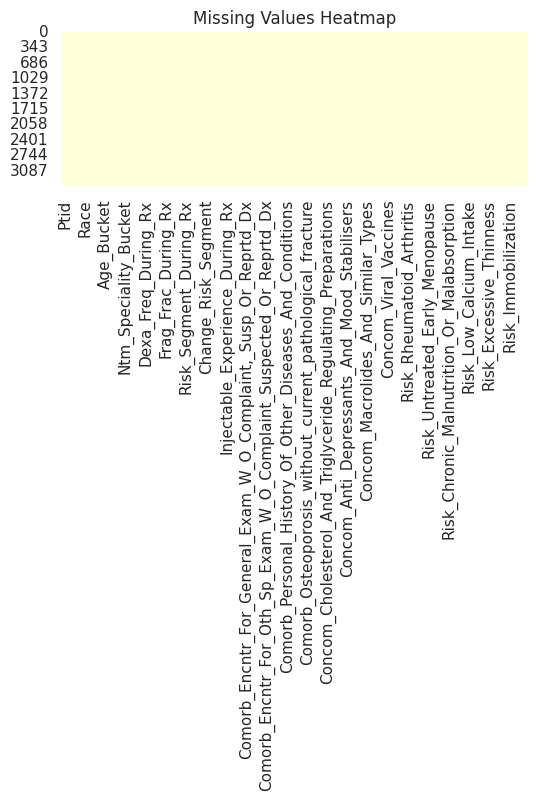

In [75]:
# Visualize missing values
plt.figure(figsize=(6, 2))
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

In [76]:
# Summary of categorical columns
print("\nCategorical Column Summary:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Categorical Column Summary:
Ptid: 3424 unique values
Persistency_Flag: 2 unique values
Gender: 2 unique values
Race: 4 unique values
Ethnicity: 3 unique values
Region: 5 unique values
Age_Bucket: 4 unique values
Ntm_Speciality: 36 unique values
Ntm_Specialist_Flag: 2 unique values
Ntm_Speciality_Bucket: 3 unique values
Gluco_Record_Prior_Ntm: 2 unique values
Gluco_Record_During_Rx: 2 unique values
Dexa_During_Rx: 2 unique values
Frag_Frac_Prior_Ntm: 2 unique values
Frag_Frac_During_Rx: 2 unique values
Risk_Segment_Prior_Ntm: 2 unique values
Tscore_Bucket_Prior_Ntm: 2 unique values
Risk_Segment_During_Rx: 3 unique values
Tscore_Bucket_During_Rx: 3 unique values
Change_T_Score: 4 unique values
Change_Risk_Segment: 4 unique values
Adherent_Flag: 2 unique values
Idn_Indicator: 2 unique values
Injectable_Experience_During_Rx: 2 unique values
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 2 unique values
Comorb_Encounter_For_Immunization: 2 unique values
Comorb_Encntr_For_General_E

In [77]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

**Visualizing Data Distributions**

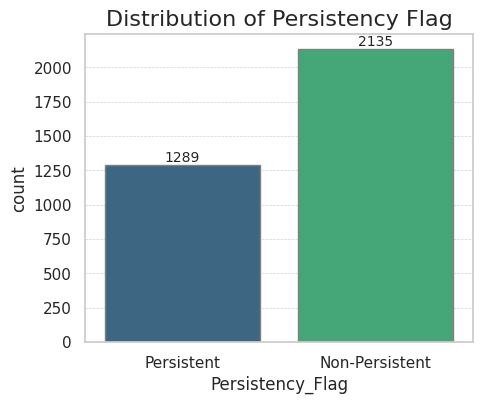

In [78]:
# Distribution of the target variable (Persistency_Flag)
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
ax=sns.countplot(x='Persistency_Flag', data=data, palette="viridis",edgecolor='gray')
plt.title("Distribution of Persistency Flag", fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, labels=[f'{int(val)}' for val in container.datavalues])
plt.show()

* The above chart represents the distribution of a "Persistency Flag" variable, showing two categories: Persistent and Non-Persistent. Based on the counts displayed, there are more Non-Persistent instances (2135) than Persistent ones (1289).
  
**Hypothesis:** The majority of subjects in the dataset show non-persistent behavior, indicating a higher prevalence of non-adherence or irregularity in the target variable related to persistency.

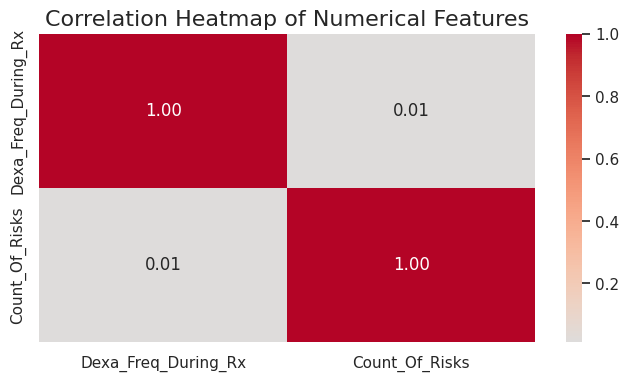

In [79]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(8, 4))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

* The heatmap shows the correlation between two numerical features: "Dexa_Freq_During_Rx" and "Count_Of_Risks." The correlation coefficient is 0.01, indicating a very weak relationship between these two variables.

**Hypothesis:** There is no significant correlation between the frequency of DEXA scans during treatment and the count of risks, suggesting that changes in the frequency of scans do not have a substantial impact on the number of risks observed.

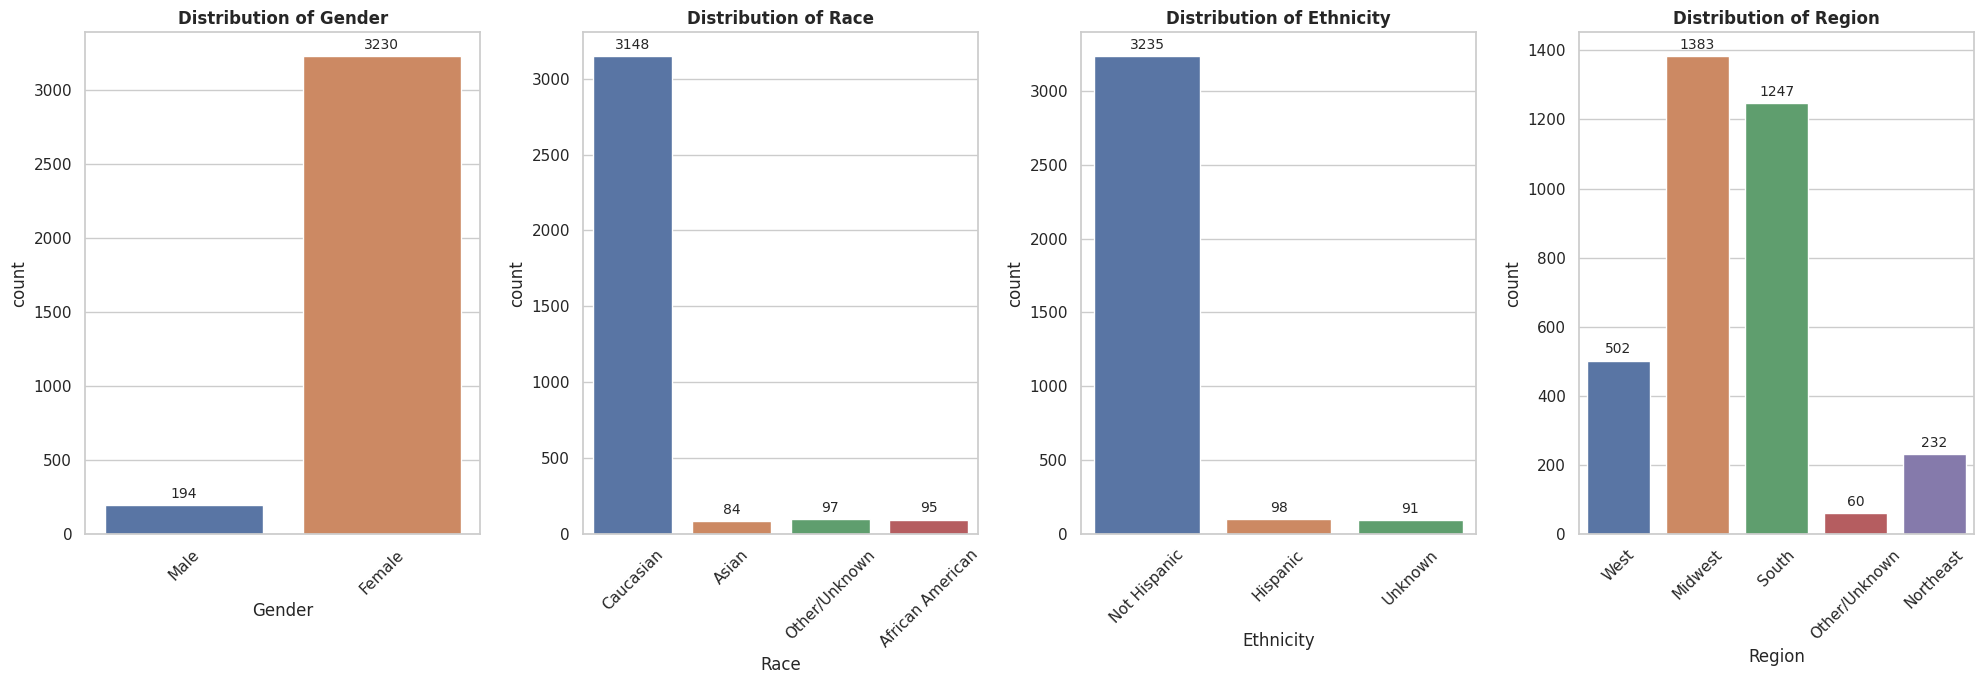

In [80]:
# Subplots for the categorical columns
fig, axes = plt.subplots(1, 4, figsize=(20, 7))
categorical_columns = ['Gender', 'Race', 'Ethnicity', 'Region']

for i, col in enumerate(categorical_columns):
    bar_plot = sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, y=1, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    
    for bar in bar_plot.containers:
        bar_plot.bar_label(bar, fmt='%d', padding=3, fontsize=10)

plt.tight_layout()
plt.show()


The charts show the distributions of Gender, Race, Ethnicity, and Region in the dataset. Key observations are:

**Gender:** The majority are Female (3230) compared to Male (194).

**Hypothesis:** The dataset is predominantly female, which might influence the analysis of gender-specific trends.

**Race:** Most individuals are Caucasian (3148), with smaller groups for Asian (84), Other/Unknown (97), and African American (95).

**Hypothesis:** Race distribution is heavily skewed towards Caucasians, which may limit insights into other racial groups.

**Ethnicity:** Most individuals are Not Hispanic (3235), with few Hispanic (98) and Unknown (91).

**Hypothesis:** Ethnicity differences are minimal, as the majority are Not Hispanic.

**Region:** The largest groups are from the Midwest (1383) and South (1247), followed by West (502), Northeast (232), and Other/Unknown (60).

**Hypothesis:** Regional trends are more likely to reflect data from the Midwest and South, given their larger representation.

These distributions suggest potential biases in the dataset, which could affect generalizability.

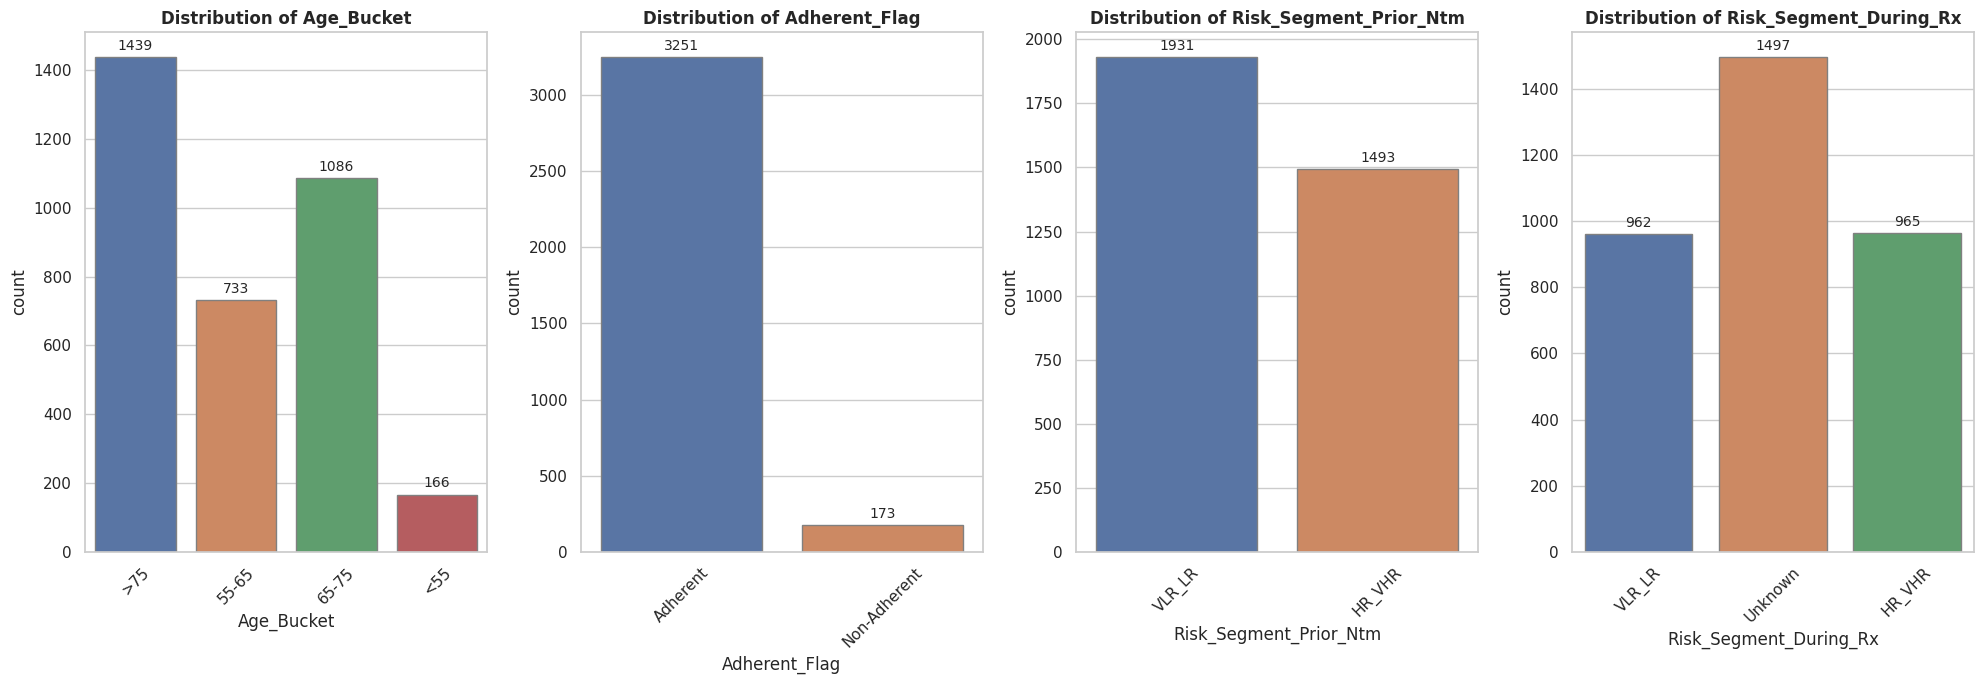

In [81]:
# Subplots for the categorical columns
fig, axes = plt.subplots(1, 4, figsize=(20, 7))
categorical_columns = ['Age_Bucket', 'Adherent_Flag', 'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']

for i, col in enumerate(categorical_columns):
    # Create the countplot
    bar_plot = sns.countplot(x=data[col], ax=axes[i], edgecolor='gray')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, y=1, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
   
    for bar in bar_plot.containers:
        bar_plot.bar_label(bar, fmt='%d', padding=3, fontsize=10)
plt.tight_layout()
plt.show()

Here are the simple hypotheses based on the charts:

**Age Bucket:** Most patients are older adults (>75 years), followed by 65-75 years. Very few are under 55.

**Hypothesis:** Age impacts adherence and risk segments, with older adults likely dominating trends.

**Adherence Flag:** The majority are adherent, with very few being non-adherent.

**Hypothesis:** Adherence is generally high, but specific factors may influence non-adherence.

**Risk Segment (Prior NTM):** More patients are in the "Very Low Risk - Low Risk (VLR-LR)" group compared to "High Risk - Very High Risk (HR-VHR).

**Hypothesis:** Prior risk levels lean towards lower categories, possibly reflecting effective prior interventions.

**Risk Segment (During Rx):** A significant portion of data has "Unknown" risk, followed by VLR-LR and HR-VHR groups almost equally.

**Hypothesis:** Risk categorization during treatment may need better data quality or more clarity in recording.

These trends could guide targeted interventions to improve outcomes.

**Barplots to Show the Relationship Between Categorical Columns and Target Variable:**

check how the categorical features relate to the target variable (Persistency_Flag). This could help us understand if some categories are associated with higher or lower persistency.

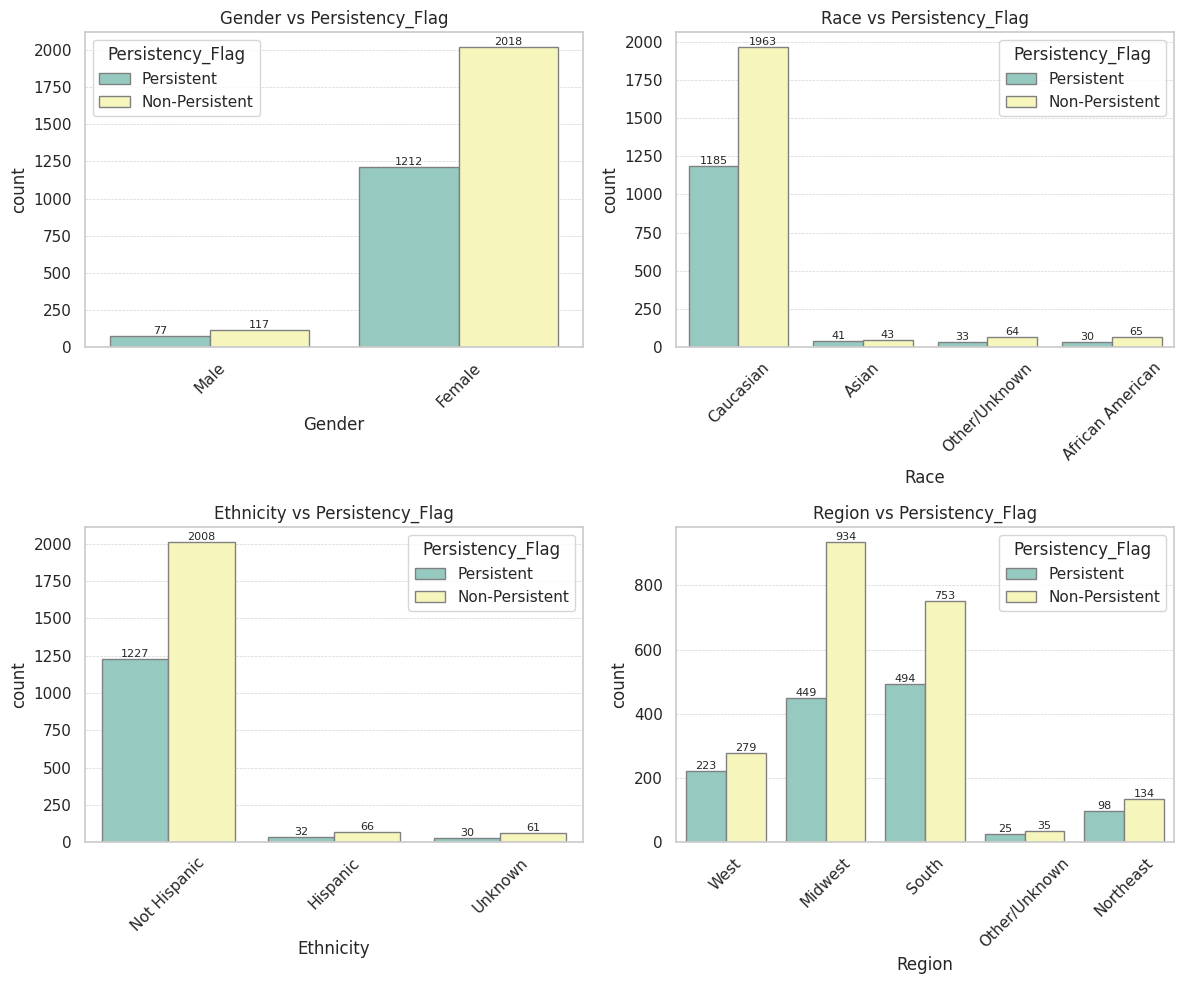

In [82]:
plt.figure(figsize=(12, 10))

# Gender vs Persistency_Flag
plt.subplot(2, 2, 1)
ax1 = sns.countplot(x='Gender', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Gender vs Persistency_Flag')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')  
plt.xticks(rotation=45)  
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d',fontsize=8) 

# Race vs Persistency_Flag
plt.subplot(2, 2, 2)
ax2 = sns.countplot(x='Race', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Race vs Persistency_Flag')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.xticks(rotation=45) 
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d',fontsize=8)  

# Ethnicity vs Persistency_Flag
plt.subplot(2, 2, 3)
ax3 = sns.countplot(x='Ethnicity', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Ethnicity vs Persistency_Flag')
plt.xticks(rotation=45) 
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d',fontsize=8) 

# Region vs Persistency_Flag
plt.subplot(2, 2, 4)
ax4 = sns.countplot(x='Region', hue='Persistency_Flag', data=data, palette="Set3", edgecolor='gray')
plt.title('Region vs Persistency_Flag')
plt.xticks(rotation=45) 
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', fontsize=8)  

plt.tight_layout()
plt.show()

Based on the visualizations provided, the relationship between the Persistency_Flag (Persistent and Non-Persistent) and various demographic attributes like Gender, Race, Ethnicity, and Region is analyzed in detail. The observations and hypotheses are as follows:

**1. Gender vs Persistency_Flag:**
Females dominate the dataset, with a significantly higher count of both Persistent (1,212) and Non-Persistent (2,018) cases compared to males.
For males, the gap between Persistent (77) and Non-Persistent (117) cases is relatively smaller.

**Hypothesis:**
Gender differences in healthcare-seeking behavior might explain this disparity. Women are generally more likely to seek healthcare but may face challenges maintaining adherence due to factors such as caregiving responsibilities, medication side effects, or systemic barriers in healthcare access.

**2. Race vs Persistency_Flag:**
The majority of cases belong to the Caucasian category, with a higher count of Non-Persistent (1,963) compared to Persistent (1,185).
Other racial groups, such as Asian, African American, and Other/Unknown, have significantly fewer cases, with a consistent trend of Non-Persistent dominating.

**Hypothesis:**
Racial disparities in healthcare delivery may influence medication persistency. Factors such as systemic inequities, cultural perceptions of medication adherence, and trust in the healthcare system might impact adherence rates among different racial groups.

**3. Ethnicity vs Persistency_Flag:**
Among Non-Hispanic individuals, Non-Persistent cases (2,008) significantly outnumber Persistent cases (1,227).
For Hispanic and Unknown ethnicity groups, there are fewer total cases, but the trend of Non-Persistent outweighing Persistent persists.

**Hypothesis:**
Ethnicity may play a role in medication adherence due to cultural, social, or access-related factors. For example, Non-Hispanic individuals may be more likely to start treatment but less likely to maintain adherence, potentially due to healthcare accessibility or socioeconomic challenges.

**4. Region vs Persistency_Flag:**
In all regions (West, Midwest, South, Northeast, Other/Unknown), Non-Persistent cases dominate.
The Midwest and South regions have the highest counts of both categories, with a significant gap favoring Non-Persistent cases.

**Hypothesis:**
Geographic location might influence medication persistency due to disparities in healthcare access, regional healthcare policies, or socioeconomic differences. For example, rural areas in regions like the Midwest and South may face more barriers to consistent medication access and adherence.

**Data Gaps**
The presence of Unknown categories across several demographic groups suggests that missing data may contribute to variability in persistency trends. This is particularly evident in the Ethnicity, Race, and Region attributes, where "Unknown" entries are common.

**Conclusion:**
These visualizations highlight a recurring pattern where Non-Persistent individuals dominate across multiple demographic attributes, including gender, race, ethnicity, and region. Specific groups such as Caucasian, females, and individuals in the South and Midwest regions—exhibit significant imbalances favoring non-persistence.



**Heatmap of Categorical Features (using Cramér's V):**
we can compute the association between categorical variables using Cramér's V, which gives a measure of association between categorical variables. The heatmap will show us which categorical features are strongly related to each other.

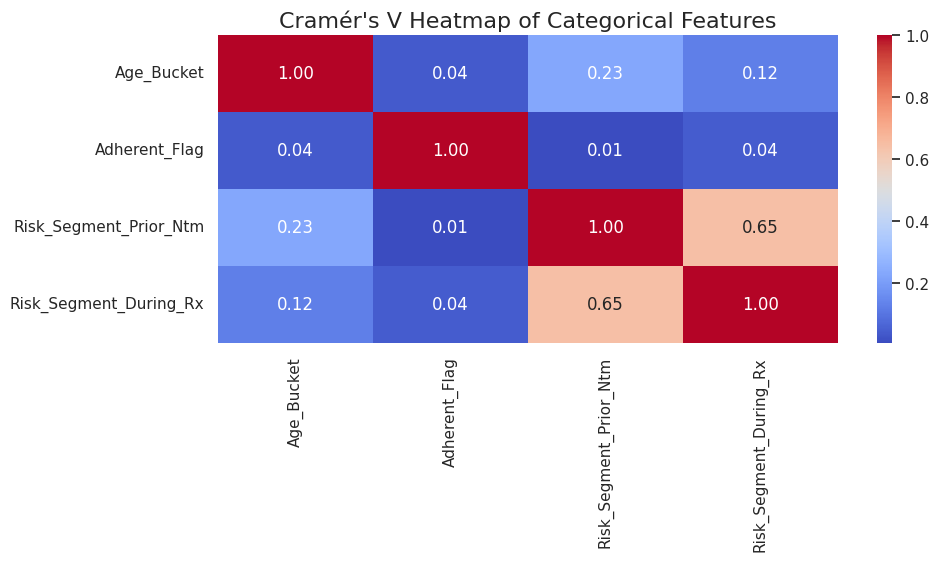

In [83]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Create an empty dataframe for Cramér's V scores
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Plot heatmap of Cramér's V
plt.figure(figsize=(10, 4))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér's V Heatmap of Categorical Features", fontsize=16)
plt.show()


**Age Bucket vs. Others:** Age group shows a weak relationship with adherence (0.04) and risk segments (0.23 for prior risk, 0.12 for during treatment).

**Hypothesis:** Age has minimal influence on adherence and risk levels.

**Adherence Flag:** Very low correlation with other variables (max 0.04).

**Hypothesis:** Adherence is largely independent of age or risk segments.

**Risk Segment (Prior NTM vs. During Rx):** Strong relationship (0.65).

**Hypothesis:** Prior and during-treatment risk segments are closely linked, indicating a trend continuation in risk classification.

This suggests risk-related factors might have interdependencies, while age and adherence seem more independent.

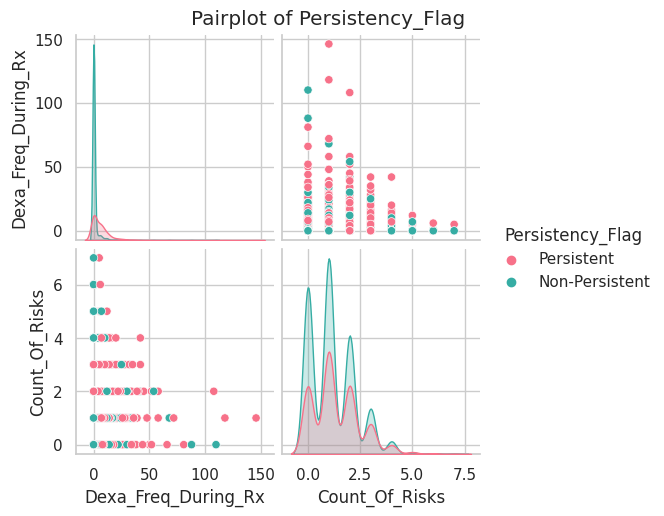

In [84]:
selected_features = ['Dexa_Freq_During_Rx', 'Count_Of_Risks',  'Persistency_Flag']
sns.pairplot(data[selected_features], hue="Persistency_Flag", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Persistency_Flag", y=1.02)  
plt.show()


**Comorbidities Frequency:**  Understand the distribution of comorbidities and their relationship with persistency.

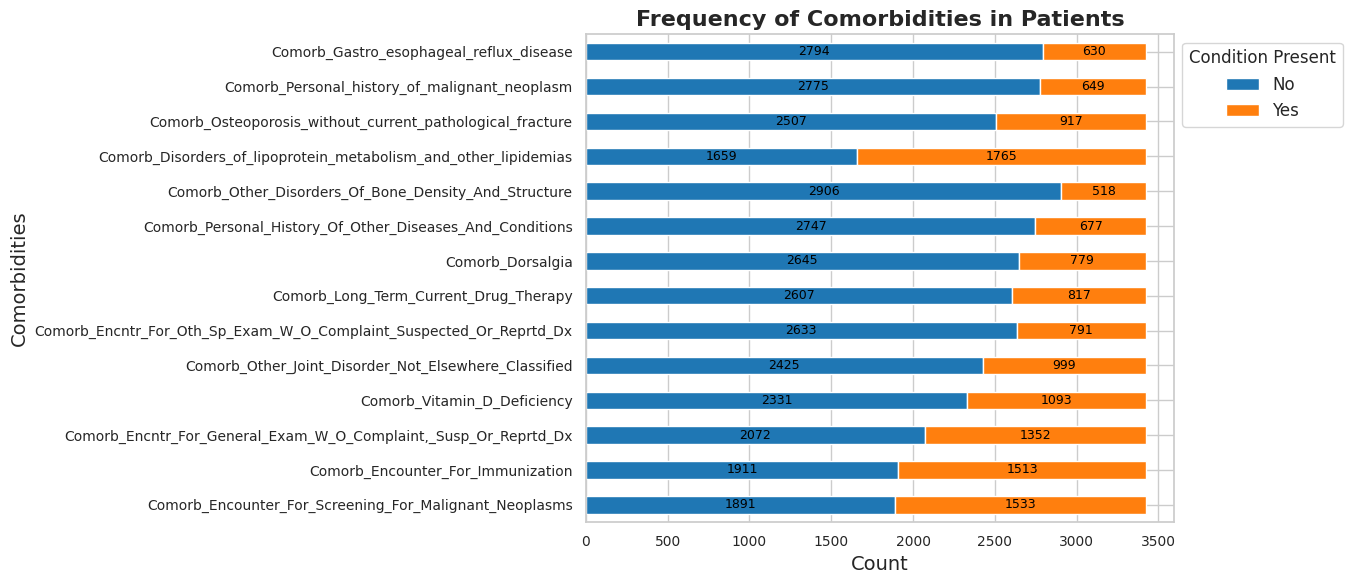

In [85]:
#### Select comorbidity-related columns
comorb_columns = [col for col in data.columns if col.startswith("Comorb_")]
comorb_data = data[comorb_columns].apply(lambda x: x.value_counts()).T

# Plot the horizontal stacked bar chart
ax = comorb_data.plot(kind='barh',stacked=True,figsize=(12, 6),color=['#1f77b4', '#ff7f0e'])
# Add values on bars (simplified)
for i, row in enumerate(comorb_data.values):  # Loop over rows (comorbidities)
    cumulative_width = 0  # Track cumulative width for stacked bars
    for j, value in enumerate(row):  # Loop over "No" and "Yes" values
        cumulative_width += value  # Update the position for the label
        ax.text(cumulative_width - (value / 2), i, int(value), ha='center', va='center',color='black', fontsize=9)

# Enhance the chart's layout
plt.title("Frequency of Comorbidities in Patients", fontsize=16, weight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Comorbidities", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend(title="Condition Present",labels=['No', 'Yes'],bbox_to_anchor=(1, 1),loc='upper left',fontsize=12)
plt.show()


 # Check for Distribution and Outliers



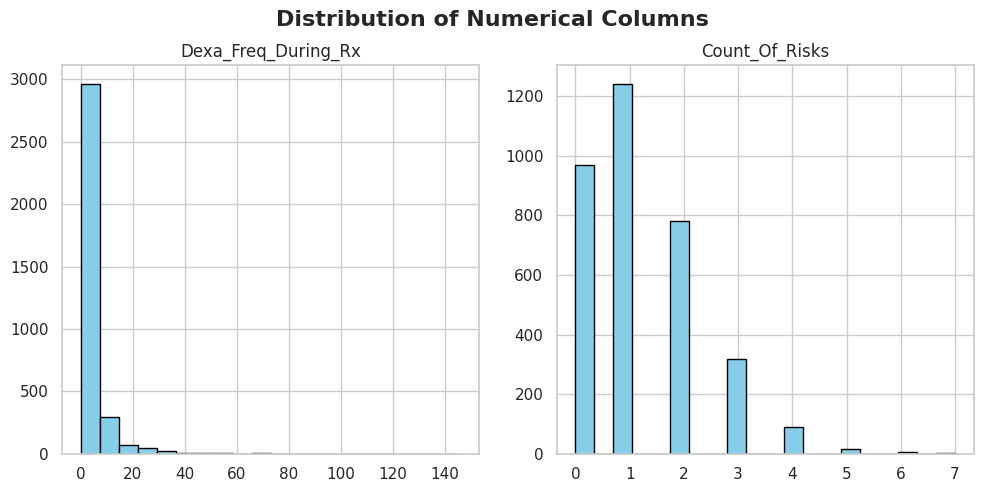

In [86]:
# Visualizing the distribution of numerical columns

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns 
data[numerical_columns].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black', grid=True)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.suptitle("Distribution of Numerical Columns", fontsize=16, y=0.98, fontweight='bold')

plt.show()

#  Outlier Detection:
# 1. IQR Method

In [87]:
# Detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Apply to numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Dexa_Freq_During_Rx: 460
Outliers in Count_Of_Risks: 8


In [88]:
data.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0  OB/GYN/Others/PCP/Unknown  ...                                   N   
1  OB/GYN/Others/PCP/Unknown  ...                                   N   
2  OB/GYN/Others/PCP/Unknown  ...                                   N   
3  OB/GYN/Others/PCP/Unknown  ...                                   N   
4  OB/GYN/Others/PCP/Unknown  ...                                   N   

  Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                       N                             N   
1                       N                             N   
2                       Y                             N   
3                       N                             N   
4                       N                             N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 69 columns]

# 2. Isolation Forest Method

**How It Works**
* Isolation Forest is a machine learning algorithm designed for anomaly detection.
* It works by randomly partitioning the data. Points that require fewer splits to isolate are considered outliers.
* The contamination parameter determines the expected proportion of outliers in the dataset.

In [89]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42) 
outlier_labels = iso.fit_predict(data[numerical_cols])

# Identify outliers
data['Outlier'] = outlier_labels
print(data['Outlier'].value_counts())

Outlier
 1    3252
-1     172
Name: count, dtype: int64


The Isolation Forest identified 172 records as outliers across all numerical columns. This is fewer than the IQR method for "Dexa_Freq_During_Rx," which flagged 460 outliers.

**Strengths of Isolation Forest**
* Handles skewed and non-Gaussian distributions well.
* Considers multidimensional interactions between variables, unlike the univariate IQR method.

In [90]:
data.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Low_Calcium_Intake  \
0  OB/GYN/Others/PCP/Unknown  ...                       N   
1  OB/GYN/Others/PCP/Unknown  ...                       N   
2  OB/GYN/Others/PCP/Unknown  ...                       Y   
3  OB/GYN/Others/PCP/Unknown  ...                       N   
4  OB/GYN/Others/PCP/Unknown  ...                       N   

  Risk_Vitamin_D_Insufficiency  Risk_Poor_Health_Frailty  \
0                            N                         N   
1                            N                         N   
2                            N                         N   
3                            N                         N   
4                            N                         N   

  Risk_Excessive_Thinness Risk_Hysterectomy_Oophorectomy  \
0                       N                              N   
1                       N                              N   
2                       N                              N   
3                       N                              N   
4                       N                              N   

  Risk_Estrogen_Deficiency Risk_Immobilization Risk_Recurring_Falls  \
0                        N                   N                    N   
1                        N                   N                    N   
2                        N                   N                    N   
3                        N                   N                    N   
4                        N                   N                    N   

  Count_Of_Risks Outlier  
0              0       1  
1              0       1  
2              2       1  
3              1       1  
4              1       1  

[5 rows x 70 columns]

# 3. Descriptive Statistics Analysis
* Checking for unusual/incoherent values for each column. (Ex: str values in int columns).Checking for unusual/incoherent values for each column. (Ex: str values in int columns). 

In [91]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])# select all columns by the type, in this case, numeric  
categorical_columns = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])# exclude all columns by the type, in this case, numeric

In [92]:
print(numerical_columns['Dexa_Freq_During_Rx'].sort_values().unique(), end='\n\n')
print(numerical_columns['Count_Of_Risks'].sort_values().unique(), end='\n\n')

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36
  37  38  39  40  42  44  45  48  50  52  54  58  66  68  69  72  81  88
 108 110 118 146]

[0 1 2 3 4 5 6 7]



No incoherent values for the numerical variables

In [93]:
# Define the function to calculate descriptive statistics
def descriptive_numerical_columns(data, numerical_columns):
    # Create an empty list to store the result dictionaries
    result = []
     
    for col in numerical_columns:
        # Calculate the statistics for each column
        column_stats = {
            'attributes': col,
            'min': data[col].min(),
            'max': data[col].max(),
            'range': data[col].max() - data[col].min(),
            'mean': data[col].mean(),
            'median': data[col].median(),
            'std': data[col].std(),
            'skew': skew(data[col].dropna()),  # Drop NA values before calculating skew
            'kurtosis': kurtosis(data[col].dropna())  # Drop NA values before calculating kurtosis
        }
        
 # Append the result dictionary to the result list
        result.append(column_stats)
    
    stats_data = pd.DataFrame(result)
    
    return stats_data

numerical_columns = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']  
result = descriptive_numerical_columns(data, numerical_columns)
(result)


attributes  min  max  range      mean  median       std      skew  \
0  Dexa_Freq_During_Rx    0  146    146  3.016063     0.0  8.136545  6.805747   
1       Count_Of_Risks    0    7      7  1.239486     1.0  1.094914  0.879405   

    kurtosis  
0  74.647502  
1   0.897420

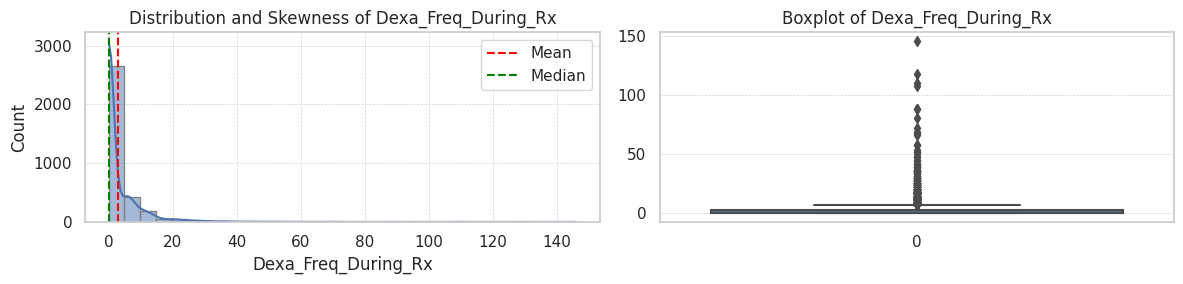

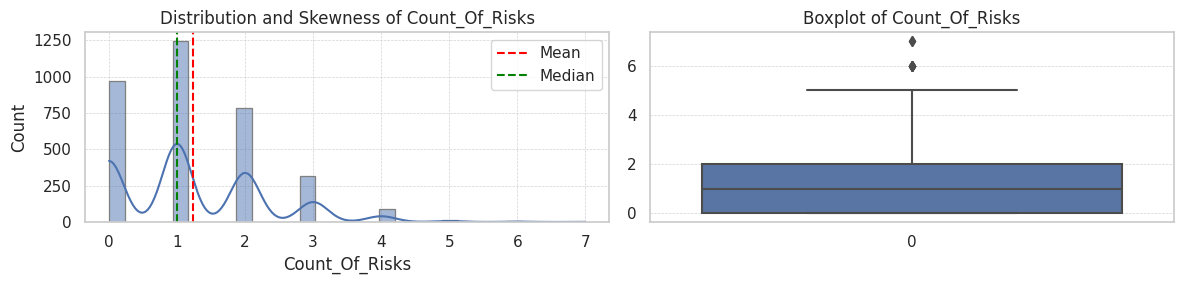

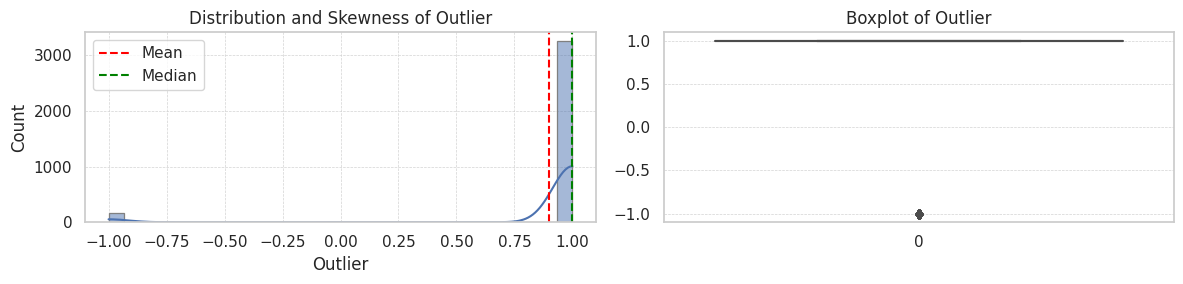

In [94]:
# Visualize numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(12, 3))

 # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30, edgecolor='gray')
    plt.axvline(data[col].mean(), color="red", linestyle="--", label="Mean")
    plt.axvline(data[col].median(), color="green", linestyle="--", label="Median")
    plt.title(f'Distribution and Skewness of {col}')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='both')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
  
    plt.tight_layout()
    plt.show()

# 1. Handling Outliers:
Outliers can significantly distort statistical analyses. Below are some common techniques to handle outliers:

**Z-score:** This method checks how far a data point is from the mean in terms of standard deviations. Data points with a Z-score greater than 3 or less than -3 are usually considered outliers.

**IQR (Interquartile Range)**: Outliers can also be detected using the IQR method. Any data point that falls below Q1 - 1.5*IQR or above Q3 + 1.5*IQR is considered an outlier.

# 2. Handling Skewness:
**Log Transformation**: A log transformation can reduce positive skewness.

**Square Root or Cube Root Transformation:** These can also reduce skewness in the data, especially when the data has a high positive skew.

**Box-Cox Transformation:**  A statistical transformation that can be applied to make the data more normally distributed.

Outliers for Dexa_Freq_During_Rx_Log: 42
Outliers for Count_Of_Risks_Sqrt: 0
Skewness for Dexa_Freq_During_Rx_Log: 1.3300610554584147
Skewness for Count_Of_Risks_Sqrt: -0.32745539912302396


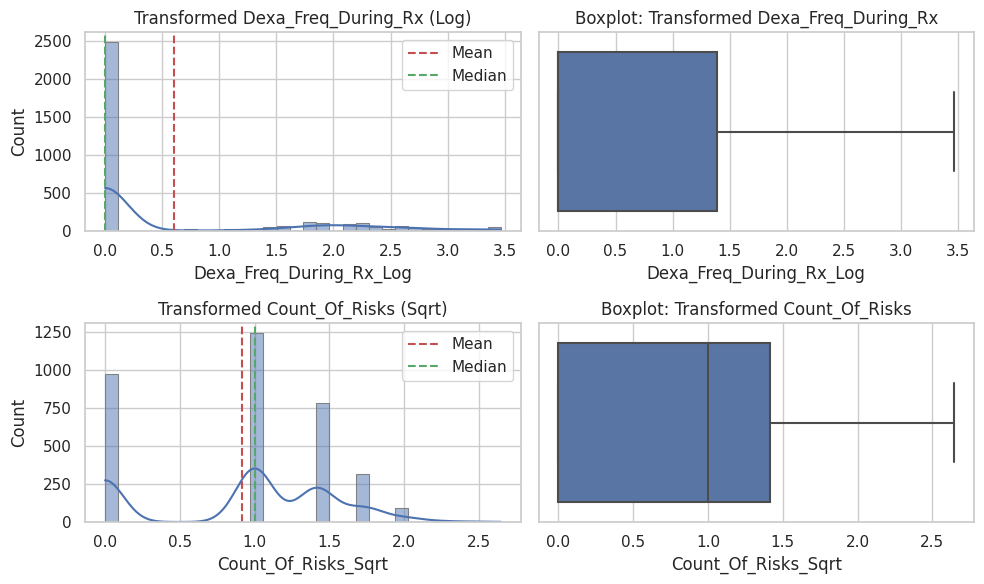

In [95]:
# Dexa_Freq_During_Rx and Count_Of_Risks

# Step 1: Analyze Skewness and Transform Data
data['Dexa_Freq_During_Rx_Log'] = np.log1p(data['Dexa_Freq_During_Rx'])
data['Count_Of_Risks_Sqrt'] = np.sqrt(data['Count_Of_Risks'])

# Step 2: Outlier Treatment using IQR
def treat_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify and count outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Outliers for {column}: {outliers.shape[0]}')
    # Capping outliers
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

data = treat_outliers(data, 'Dexa_Freq_During_Rx_Log')
data = treat_outliers(data, 'Count_Of_Risks_Sqrt')

# Step 3: Skewness Calculation
dex_skew = skew(data['Dexa_Freq_During_Rx_Log'].dropna())
count_risks_skew = skew(data['Count_Of_Risks_Sqrt'].dropna())

print(f'Skewness for Dexa_Freq_During_Rx_Log: {dex_skew}')
print(f'Skewness for Count_Of_Risks_Sqrt: {count_risks_skew}')

# Step 4: Visualization Post-Processing
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Distribution Plots
sns.histplot(data['Dexa_Freq_During_Rx_Log'], kde=True, ax=axes[0, 0], bins=30, edgecolor='gray')
axes[0, 0].set_title("Transformed Dexa_Freq_During_Rx (Log)")
# Adding mean and median lines
axes[0, 0].axvline(data['Dexa_Freq_During_Rx_Log'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].axvline(data['Dexa_Freq_During_Rx_Log'].median(), color='g', linestyle='--', label='Median')
axes[0, 0].legend()
   
sns.histplot(data['Count_Of_Risks_Sqrt'], kde=True, ax=axes[1, 0], bins=30, edgecolor='gray')
axes[1, 0].set_title("Transformed Count_Of_Risks (Sqrt)")
# Adding mean and median lines
axes[1, 0].axvline(data['Count_Of_Risks_Sqrt'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 0].axvline(data['Count_Of_Risks_Sqrt'].median(), color='g', linestyle='--', label='Median')
axes[1, 0].legend()

# Boxplots
sns.boxplot(x=data['Dexa_Freq_During_Rx_Log'], ax=axes[0, 1],orient='H')
axes[0, 1].set_title("Boxplot: Transformed Dexa_Freq_During_Rx")

sns.boxplot(x=data['Count_Of_Risks_Sqrt'], ax=axes[1, 1],orient='H')
axes[1, 1].set_title("Boxplot: Transformed Count_Of_Risks")

plt.tight_layout()
plt.show()              

# 1. Outliers:

**Dexa_Freq_During_Rx_Log:** The log transformation has removed 42 outliers.

**Count_Of_Risks_Sqrt:** The square root transformation has removed 0 outliers.

The log transformation successfully reduced the impact of outliers in Dexa_Freq_During_Rx, which indicates that it was a highly skewed variable before transformation. On the other hand, Count_Of_Risks doesn't have many outliers, suggesting it was already in a reasonable range or its skewness is not severe enough to warrant significant outlier removal.

# 2. Skewness:

**Dexa_Freq_During_Rx_Log:** The skewness of this column after log transformation is 1.33, which indicates that the variable is still positively skewed but much less so than before.

**Count_Of_Risks_Sqrt:** The skewness of this column after square root transformation is -0.33, which indicates the distribution is closer to normal (negatively skewed, but much less extreme than before transformation).

**Dexa_Freq_During_Rx_Log:**

* Applying a log transformation has significantly reduced skewness and minimized the impact of outliers.
* The distribution is now closer to normal.
* The boxplot shows fewer extreme outliers, making the data more manageable for modeling.
* Skewness dropped to 1.33, which is a significant improvement compared to the original skewness of 6.81.
  
**Count_Of_Risks_Sqrt:**

* A square root transformation was applied to address mild skewness and outliers.
* The transformation has further reduced the skewness to -0.33 (near symmetric).
* The boxplot now shows no extreme outliers.
* 
These transformations ensure that the data better aligns with assumptions of normality, reducing the likelihood of the model being overly influenced by rare extreme values.

In [96]:
data.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Poor_Health_Frailty  \
0  OB/GYN/Others/PCP/Unknown  ...                        N   
1  OB/GYN/Others/PCP/Unknown  ...                        N   
2  OB/GYN/Others/PCP/Unknown  ...                        N   
3  OB/GYN/Others/PCP/Unknown  ...                        N   
4  OB/GYN/Others/PCP/Unknown  ...                        N   

  Risk_Excessive_Thinness  Risk_Hysterectomy_Oophorectomy  \
0                       N                               N   
1                       N                               N   
2                       N                               N   
3                       N                               N   
4                       N                               N   

  Risk_Estrogen_Deficiency Risk_Immobilization Risk_Recurring_Falls  \
0                        N                   N                    N   
1                        N                   N                    N   
2                        N                   N                    N   
3                        N                   N                    N   
4                        N                   N                    N   

  Count_Of_Risks Outlier Dexa_Freq_During_Rx_Log Count_Of_Risks_Sqrt  
0              0       1                     0.0            0.000000  
1              0       1                     0.0            0.000000  
2              2       1                     0.0            1.414214  
3              1       1                     0.0            1.000000  
4              1       1                     0.0            1.000000  

[5 rows x 72 columns]

# Normalize/Transform Data
For skewed data, normalization or transformation can improve model performance. Here Box-Cox method used to reduce skewness.


In [97]:
from scipy.stats import boxcox
import numpy as np

# Check if the variable is positive (required for Box-Cox)
if (data['Dexa_Freq_During_Rx_Log'] > 0).all():
    data['Dexa_Freq_During_Rx_BoxCox'], _ = boxcox(data['Dexa_Freq_During_Rx_Log'])
else:
    # Use Yeo-Johnson for non-positive values
    from sklearn.preprocessing import PowerTransformer
    pt = PowerTransformer(method='yeo-johnson')
    data['Dexa_Freq_During_Rx_BoxCox'] = pt.fit_transform(data[['Dexa_Freq_During_Rx_Log']])
    
print(f"Skewness after Box-Cox Transformation: {data['Dexa_Freq_During_Rx_BoxCox'].skew()}")

Skewness after Box-Cox Transformation: 1.0243778739127456


**Assessing Skewness Threshold**
In general:
* skewness value between -0.5 and 0.5 is considered approximately symmetric.
* Values outside this range may indicate skewness, which could impact linear models but might be tolerable for tree-based models like Random Forest or Gradient Boosting.
* Since the skewness is still 1.02, it is moderate and may require further transformation for models sensitive to input distributions, like linear regression or SVM.

# Further Transformations
**Winsorization:** Winsorization can cap outliers that contribute to skewness:

In [98]:
from scipy.stats.mstats import winsorize

data['Dexa_Freq_During_Rx_Winsorized'] = winsorize(data['Dexa_Freq_During_Rx_Log'], limits=[0.05, 0.05])

print(f"Skewness after Winsorization: {data['Dexa_Freq_During_Rx_Winsorized'].skew()}")


Skewness after Winsorization: 1.2155604852975144


**Despite applying multiple transformations (Box-Cox, log, square root, and Winsorization), the feature 'Dexa_Freq_During_Rx_Log' retains a skewness of 1.024. However, since our model is robust to skewed distributions (e.g., tree-based models), we will proceed with the untransformed version.**

# Feature Engineering

In [99]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.apply(lambda x: x.sort_values().unique()))

Ptid                                                                  [P1, P10, P100, P1000, P1001, P1002, P1003, P1...
Persistency_Flag                                                                           [Non-Persistent, Persistent]
Gender                                                                                                   [Female, Male]
Race                                                                  [African American, Asian, Caucasian, Other/Unk...
Ethnicity                                                                             [Hispanic, Not Hispanic, Unknown]
Region                                                                 [Midwest, Northeast, Other/Unknown, South, West]
Age_Bucket                                                                                     [55-65, 65-75, <55, >75]
Ntm_Speciality                                                        [CARDIOLOGY, CLINICAL NURSE SPECIALIST, EMERGE...
Ntm_Specialist_Flag                     

In [100]:
df = data.copy()
df.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Hysterectomy_Oophorectomy  \
0  OB/GYN/Others/PCP/Unknown  ...                              N   
1  OB/GYN/Others/PCP/Unknown  ...                              N   
2  OB/GYN/Others/PCP/Unknown  ...                              N   
3  OB/GYN/Others/PCP/Unknown  ...                              N   
4  OB/GYN/Others/PCP/Unknown  ...                              N   

  Risk_Estrogen_Deficiency  Risk_Immobilization Risk_Recurring_Falls  \
0                        N                    N                    N   
1                        N                    N                    N   
2                        N                    N                    N   
3                        N                    N                    N   
4                        N                    N                    N   

  Count_Of_Risks Outlier Dexa_Freq_During_Rx_Log Count_Of_Risks_Sqrt  \
0              0       1                     0.0            0.000000   
1              0       1                     0.0            0.000000   
2              2       1                     0.0            1.414214   
3              1       1                     0.0            1.000000   
4              1       1                     0.0            1.000000   

  Dexa_Freq_During_Rx_BoxCox Dexa_Freq_During_Rx_Winsorized  
0                  -0.612667                            0.0  
1                  -0.612667                            0.0  
2                  -0.612667                            0.0  
3                  -0.612667                            0.0  
4                  -0.612667                            0.0  

[5 rows x 74 columns]

# Encoding Categorical Variables
For machine learning models, we need to convert these categorical variables into numerical format. 
**Identify Columns to Encode**
* **Nominal Variables:** Variables are categorical variables where the categories have no inherent order or ranking (e.g., colors, brands, types).Variables without inherent order that require one-hot encoding.

* **Ordinal Variables:** variables have categories that can be ordered or ranked in a meaningful way (e.g., low, medium, high). Variables with inherent order that require label encoding.

* **Binary Variables:** Binary variables have only two possible categories or values (e.g., 0 or 1, Yes or No). 
 
* **Target Encoding:** Target Encoding applies to categorical variables with high cardinality, and it encodes these categories based on their relationship with the target variable.Target Encoding to the feature 'Ntm_Speciality' because it likely has many unique categories, and using One-Hot Encoding would be inefficient and create too many columns. The target encoding method provides a compact and meaningful transformation of the feature, reducing dimensionality while preserving important information related to the target variable.

*  **Numerical Variables (Scaling):** Continuous variables requiring scaling for specific models.
(Dexa_Freq_During_Rx_Log, Count_Of_Risks_Sqrt)


In [101]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# List of all nominal columns to be encoded
nominal_cols = ['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Ntm_Specialist_Flag','Ntm_Speciality_Bucket', 'Adherent_Flag',
    'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
    'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
    'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
    'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy',
    'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
    'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
    'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm',
    'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 'Concom_Narcotics',
    'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones',
    'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
    'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
    'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause',
    'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption',
    'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
    'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization',
    'Risk_Recurring_Falls'
]
# Ensure the directory exists before saving
os.makedirs('parameter', exist_ok=True)

# Initialize LabelEncoder
le = LabelEncoder()
for col in nominal_cols:
    df[col] = le.fit_transform(df[col])
    pickle.dump(le, open(f'parameter/{col}_scaler.pkl', 'wb'))  # Save the encoder for later use
df[nominal_cols].head()

Persistency_Flag  Gender  Race  Ethnicity  Region  Ntm_Specialist_Flag  \
0                 1       1     2          1       4                    0   
1                 0       1     1          1       4                    0   
2                 0       0     3          0       0                    0   
3                 0       0     2          1       0                    0   
4                 0       0     2          1       0                    0   

   Ntm_Speciality_Bucket  Adherent_Flag  Idn_Indicator  \
0                      1              0              0   
1                      1              0              0   
2                      1              0              0   
3                      1              0              0   
4                      1              0              0   

   Injectable_Experience_During_Rx  ...  Risk_Chronic_Liver_Disease  \
0                                1  ...                           0   
1                                1  ...                           0   
2                                1  ...                           0   
3                                1  ...                           0   
4                                1  ...                           0   

   Risk_Family_History_Of_Osteoporosis  Risk_Low_Calcium_Intake  \
0                                    0                        0   
1                                    0                        0   
2                                    0                        1   
3                                    0                        0   
4                                    0                        0   

   Risk_Vitamin_D_Insufficiency  Risk_Poor_Health_Frailty  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   Risk_Excessive_Thinness  Risk_Hysterectomy_Oophorectomy  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   Risk_Estrogen_Deficiency  Risk_Immobilization  Risk_Recurring_Falls  
0                         0                    0                     0  
1                         0                    0                     0  
2                         0                    0                     0  
3                         0                    0                     0  
4                         0                    0                     0  

[5 rows x 53 columns]

**Label Encoding:** We apply Label Encoding to the nominal_cols list of nominal variables. This converts each unique category into a numeric value, similar to how you handle ordinal variables.

**No One-Hot Encoding:** Since you want to avoid expanding the dataset unnecessarily, we replace one-hot encoding with label encoding for nominal columns.

**Saving Encoders:** Each LabelEncoder is saved to disk with a unique name (parameter/{col}_scaler.pkl), so you can reverse the encoding later if necessary.

In [102]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to ordinal variables
ordinal_cols = ['Age_Bucket','Risk_Segment_Prior_Ntm','Risk_Segment_During_Rx', 'Tscore_Bucket_Prior_Ntm', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment']
ordinal_mapping = {
    'Age_Bucket': {'<55': 0, '55-65': 1, '65-75': 2, '>75': 3},
    'Risk_Segment_Prior_Ntm': {'VLR_LR':0, 'HR_VHR':1},
    'Risk_Segment_During_Rx': {'VLR_LR':0, 'HR_VHR':1, 'Unknown':3},
    'Tscore_Bucket_Prior_Ntm': {'<=-2.5': 0, '>2.5': 1, '>-2.5': 2},
    'Tscore_Bucket_During_Rx': {'<=-2.5': 0, '>2.5': 1, 'Unknown': 2, '>-2.5': 3},
    'Change_T_Score': {'Improved': 0, 'No change': 1, 'Worsened': 2, 'Unknown': 3},
    'Change_Risk_Segment': {'Improved': 0, 'No change': 1, 'Worsened': 2, 'Unknown': 3}
}
for col in ordinal_cols:
    df[col] = df[col].map(ordinal_mapping[col])    
df[ordinal_cols].head()

Age_Bucket  Risk_Segment_Prior_Ntm  Risk_Segment_During_Rx  \
0           3                       0                       0   
1           1                       0                       3   
2           2                       1                       1   
3           3                       1                       1   
4           3                       1                       3   

   Tscore_Bucket_Prior_Ntm  Tscore_Bucket_During_Rx  Change_T_Score  \
0                        2                        0               1   
1                        2                        2               3   
2                        0                        0               1   
3                        2                        0               1   
4                        0                        2               3   

   Change_Risk_Segment  
0                    3  
1                    3  
2                    1  
3                    1  
4                    3

In [103]:
# Apply binary encoding
binary_cols = [
    'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx',
    'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx',      
]
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'N': 0, 'Y': 1}))
df[binary_cols].head()

Gluco_Record_Prior_Ntm  Gluco_Record_During_Rx  Dexa_During_Rx  \
0                       0                       0               0   
1                       0                       0               0   
2                       0                       0               0   
3                       0                       1               0   
4                       1                       1               0   

   Frag_Frac_Prior_Ntm  Frag_Frac_During_Rx  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0                    0

In [104]:
Ntm_speciality= df['Ntm_Speciality'].unique()
Ntm_speciality

array(['GENERAL PRACTITIONER', 'Unknown', 'ENDOCRINOLOGY', 'RHEUMATOLOGY',
       'ONCOLOGY', 'PATHOLOGY', 'OBSTETRICS AND GYNECOLOGY',
       'PSYCHIATRY AND NEUROLOGY', 'ORTHOPEDIC SURGERY',
       'PHYSICAL MEDICINE AND REHABILITATION',
       'SURGERY AND SURGICAL SPECIALTIES', 'PEDIATRICS',
       'PULMONARY MEDICINE', 'HEMATOLOGY & ONCOLOGY', 'UROLOGY',
       'PAIN MEDICINE', 'NEUROLOGY', 'RADIOLOGY', 'GASTROENTEROLOGY',
       'EMERGENCY MEDICINE', 'PODIATRY', 'OPHTHALMOLOGY',
       'OCCUPATIONAL MEDICINE', 'TRANSPLANT SURGERY', 'PLASTIC SURGERY',
       'CLINICAL NURSE SPECIALIST', 'OTOLARYNGOLOGY', 'HOSPITAL MEDICINE',
       'ORTHOPEDICS', 'NEPHROLOGY', 'GERIATRIC MEDICINE',
       'HOSPICE AND PALLIATIVE MEDICINE',
       'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY',
       'VASCULAR SURGERY', 'CARDIOLOGY', 'NUCLEAR MEDICINE'], dtype=object)

Target Encoding (also called Mean Encoding) is a technique for encoding categorical features where the categories are replaced by a number that represents the mean of the target variable for each category. This is especially useful when a feature has many unique categories (i.e., high cardinality) and One-Hot Encoding (OHE) would lead to a large number of new columns, which could be computationally expensive and lead to overfitting.

**How Does Target Encoding Work?**
1) For each category in the feature (Ntm_Speciality), compute the mean of the target variable (Persistency_Flag).
2) Replace the original categories in the feature with the corresponding mean value of the target variable.

**When to Use Target Encoding?**
**High Cardinality:** When you have a categorical feature with many unique categories (high cardinality) that might result in a large number of columns with One-Hot Encoding.

**Strong Relationship to the Target:** When the categorical feature has a meaningful relationship with the target variable, which the encoding can capture to improve model performance.

In [105]:
from category_encoders import TargetEncoder

target_cols = ['Ntm_Speciality']
encoder = TargetEncoder()

# Loop through column to apply target encoding
for col in target_cols:
    # Fit the encoder on the column and the target variable 
    df[col] = encoder.fit_transform(df[col], df['Persistency_Flag'])
    
    # Save the encoder for future use
    pickle.dump(encoder, open(f'parameter/{col}_encoder.pkl', 'wb'))

print(f"Target encoding completed for columns: {target_cols}")
df[target_cols].head()

Target encoding completed for columns: ['Ntm_Speciality']


Ntm_Speciality
0        0.321824
1        0.321824
2        0.321824
3        0.321824
4        0.321824

In [106]:
df.shape

(3424, 74)

In [107]:
# Attributes to exclude after encoding
cols_drop = ['Ptid','Outlier']
df= df.drop(cols_drop, axis=1)

In [108]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.apply(lambda x: x.sort_values().unique()))

Persistency_Flag                                                                                                 [0, 1]
Gender                                                                                                           [0, 1]
Race                                                                                                       [0, 1, 2, 3]
Ethnicity                                                                                                     [0, 1, 2]
Region                                                                                                  [0, 1, 2, 3, 4]
Age_Bucket                                                                                                 [0, 1, 2, 3]
Ntm_Speciality                                                        [0.16946961958651166, 0.26764424908984524, 0.2...
Ntm_Specialist_Flag                                                                                              [0, 1]
Ntm_Speciality_Bucket                   

**Detailed Analysis of Each Comorbidity**

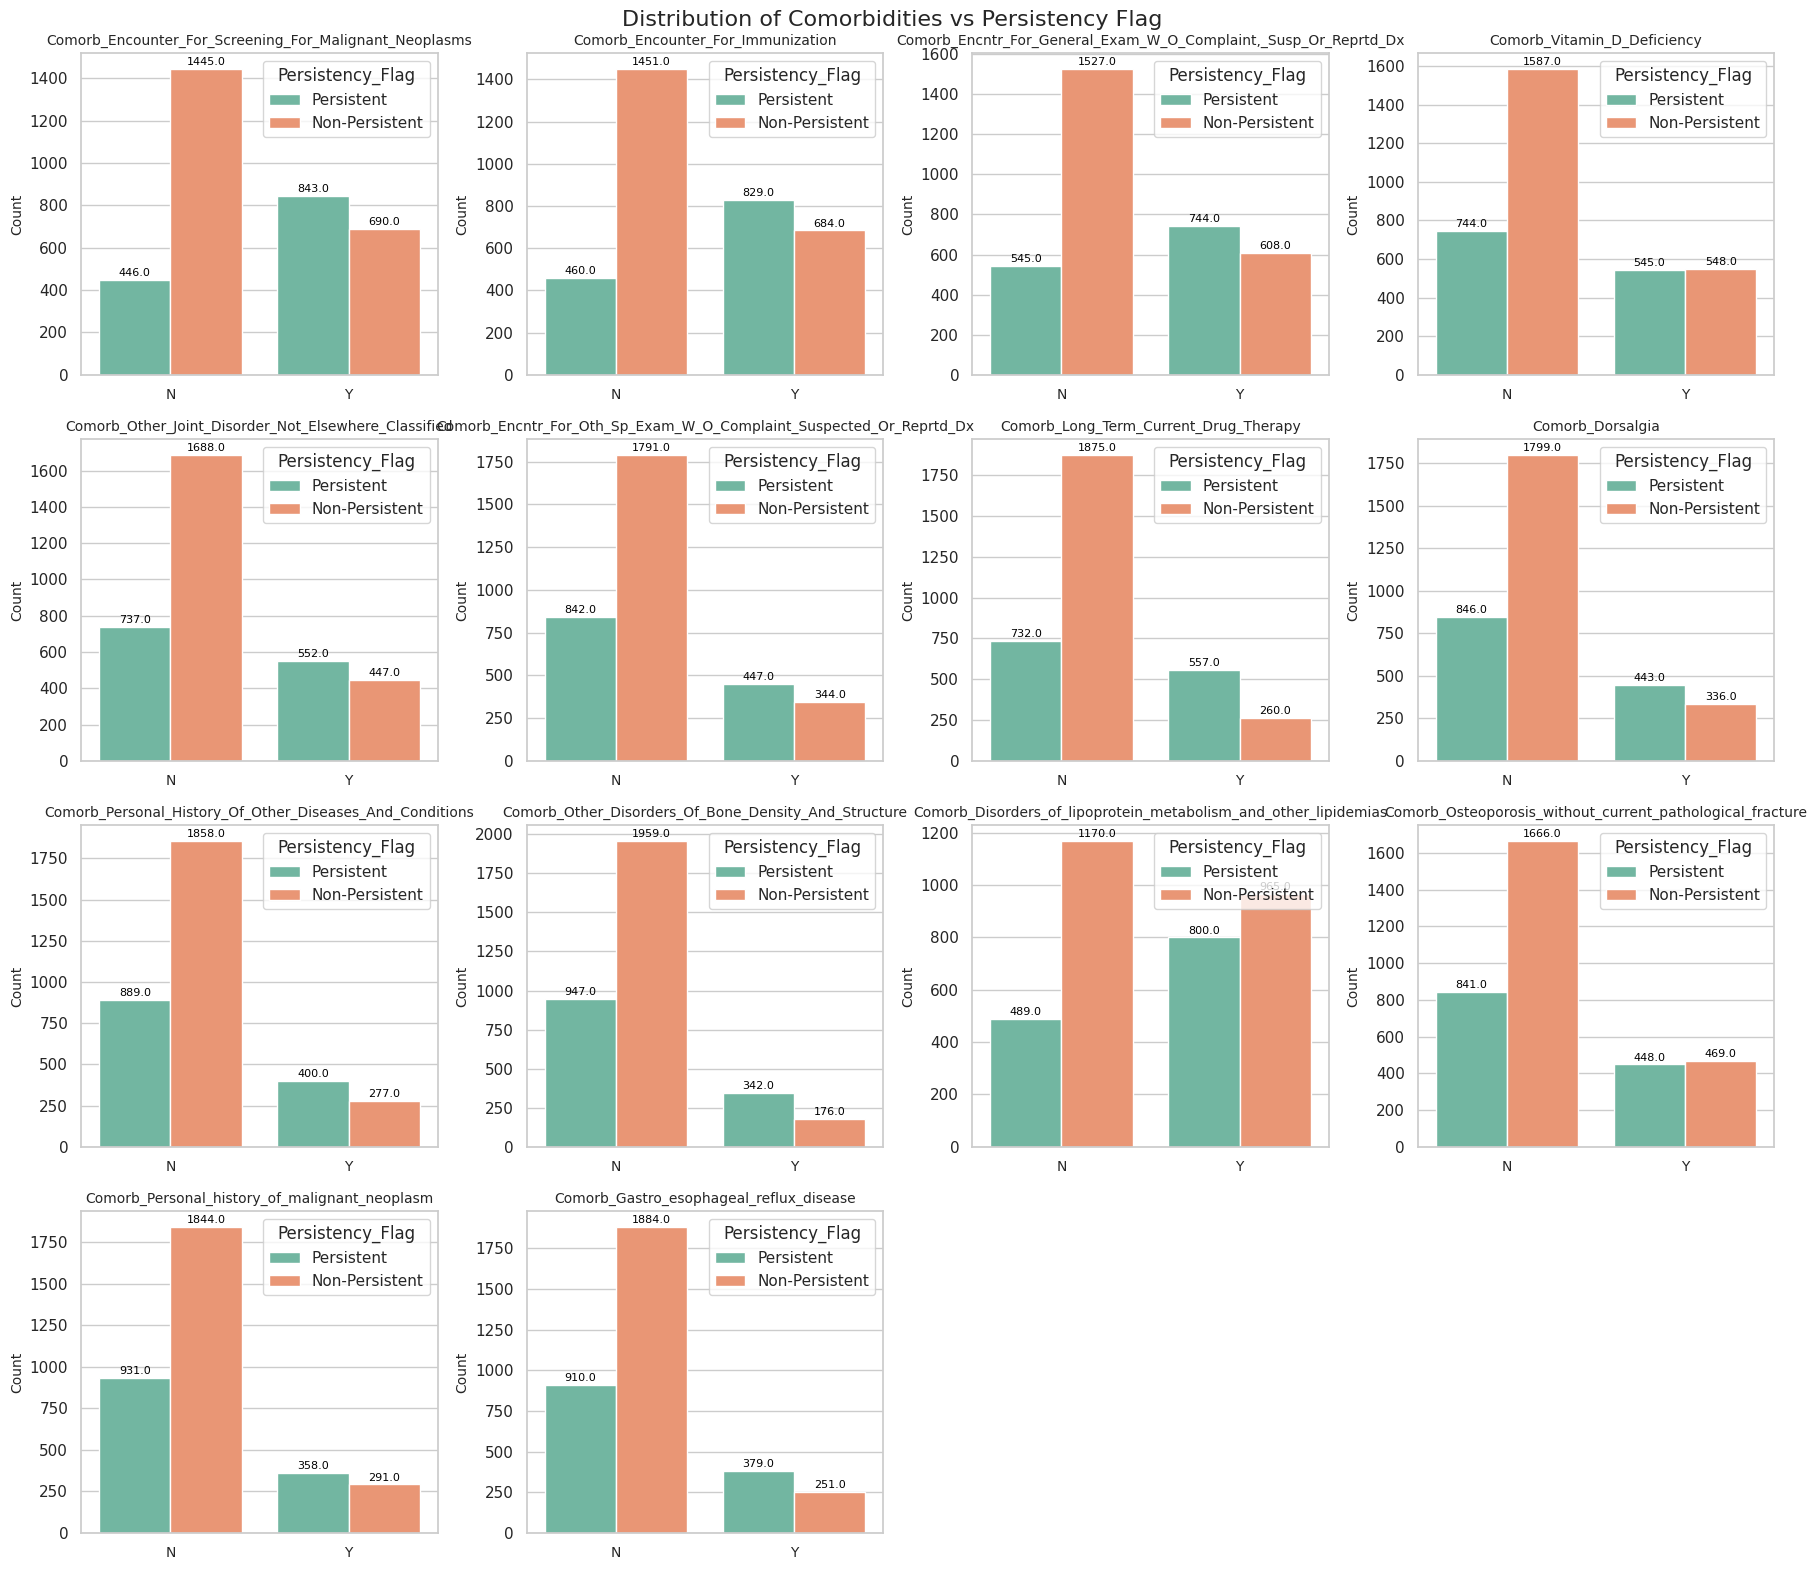

In [109]:
# Temporary replacement of Persistency_Flag values for visualization
viz_df = df.copy()
viz_df['Persistency_Flag'] = viz_df['Persistency_Flag'].replace({0: "Non-Persistent", 1: "Persistent"})

# Create subplots to display 4 charts per row
comorbidity_cols = [col for col in nominal_cols if 'Comorb' in col]
rows = (len(comorbidity_cols) // 4) + (len(comorbidity_cols) % 4 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(18, rows * 4))
axes = axes.flatten()

# Loop through comorbidity columns and create count plots
for idx, col in enumerate(comorbidity_cols):
    sns.countplot(x=col,hue='Persistency_Flag',data=viz_df,ax=axes[idx],palette='Set2')
    axes[idx].set_title(f"{col}", fontsize=10)
    axes[idx].set_xlabel("")  # Remove individual x-axis labels
    axes[idx].set_ylabel("Count", fontsize=10)

    # Replace x-axis tick labels (0 -> N, 1 -> Y)
    axes[idx].set_xticklabels(['N', 'Y'], fontsize=10)

    # Annotate the bars with counts
    for p in axes[idx].patches:
        axes[idx].annotate(f"{p.get_height()}", 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', fontsize=8, color='black', 
                           xytext=(0, 5), textcoords='offset points')

# Hide unused subplots
for i in range(len(comorbidity_cols), len(axes)):
    fig.delaxes(axes[i])

# Add a single title for the entire figure
fig.suptitle("Distribution of Comorbidities vs Persistency Flag", fontsize=16, y=0.98)
# Adjust layout for better spacing
plt.subplots_adjust(top=0.85, hspace=0.5, wspace=0.2)
plt.tight_layout()
plt.show()



**Comorb_Encounter_For_Screening_For_Malignant_Neoplasms:**
* **N (No screening):** Majority of non-persistent patients (1445) compared to persistent (446).
* **Y (Screening done):** The distribution is more balanced, but persistent patients (843) outnumber non-persistent (690).

**Hypothesis:** Patients who undergo screening might be more aware of their health, leading to higher adherence. Conversely, those not screened might neglect treatment adherence.
  
**Comorb_Encounter_For_Immunization:**
* **N (No immunization):** Similar trend as above, with a higher count of non-persistent patients (1451) compared to persistent (460).
* **Y (Immunized):** Persistent patients (829) slightly exceed non-persistent (684).

**Hypothesis:** Immunization is indicative of preventive healthcare behavior, which might positively correlate with persistency.

**Comorb_Encounter_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx:**
* **N (No general exam):** A significant gap, with more non-persistent patients (1527) than persistent (545).
* **Y (General exam conducted):** Persistent patients (744) are slightly more than non-persistent (608).

**Hypothesis:** Routine health checkups might correlate with increased medication adherence. Lack of regular health exams may signify lower healthcare engagement.

**Comorb_Vitamin_D_Deficiency:**
* **N (No deficiency):** Non-persistent patients (1587) far outnumber persistent (744).
* **Y (Deficiency present):** Persistent (545) and non-persistent (548) counts are almost equal.

**Hypothesis:*** Vitamin D deficiency might serve as a motivation for better adherence due to direct symptoms or linked treatment protocols. However, addressing deficiency doesn’t significantly differentiate between groups.

**Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified:**
* **N (No joint disorders):** Non-persistent patients (1688) dominate over persistent (737).
* **Y (Joint disorders present):** Persistent patients (552) slightly outnumber non-persistent (447).

**Hypothesis:** Chronic conditions like joint disorders might drive higher engagement with healthcare providers, leading to better persistency.

**Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx:**
* **N (No special exam):** Non-persistent patients (1791) greatly exceed persistent (842).
* **Y (Special exam done):** Persistent (447) slightly surpass non-persistent (344).

**Hypothesis:** Patients undergoing specialized exams may have a stronger relationship with their healthcare providers, positively influencing persistency.

**Comorb_Long_Term_Current_Drug_Therapy:**
* **N (No long-term drug therapy):** A significant gap exists, with non-persistent patients (1875) far outnumbering persistent (732).
* **Y (Long-term therapy ongoing):** Persistent patients (557) are notably higher than non-persistent (260).

**Hypothesis:** Patients on long-term drug therapy might have a structured treatment plan and monitoring, leading to better adherence. Conversely, those not on long-term therapy might lack consistency in their healthcare behavior.

**Comorb_Dorsalgia:**
* **N (No dorsalgia):** Non-persistent patients (1799) significantly exceed persistent (846).
* **Y (Dorsalgia present):** Persistent (443) are more than non-persistent (336).

**Hypothesis:** Pain-related conditions like dorsalgia might motivate patients to adhere better to treatment regimens due to symptom management needs.

**Comorb_Personal_History_Of_Other_Diseases_And_Conditions**
* **Patients without this comorbidity (N):** Non-persistent patients dominate with 1,858 cases compared to 889 persistent ones.
* **Patients with this comorbidity (Y):** The persistent group (400 cases) outnumbers the non-persistent group (277 cases).

**Hypothesis:** Patients with a history of other diseases and conditions may be more aware of the importance of medication adherence, leading to higher persistence.

**Comorb_Other_Disorders_Of_Bone_Density_And_Structure**
* **Patients without this comorbidity (N):** A much larger proportion of non-persistent patients (1,959 cases) compared to persistent patients (947 cases).
* **Patients with this comorbidity (Y):** The persistent group (342 cases) is almost double the non-persistent group (176 cases).

**Hypothesis:** Bone density disorders are chronic and require long-term treatment. Patients with this condition may be more motivated to adhere to their prescribed medication regimen.

**Comorb_Disorders_Of_Lipoprotein_Metabolism_And_Other_Lipidemias**
* **Patients without this comorbidity (N):** Non-persistent patients dominate (1,170 cases) compared to persistent patients (489 cases).
* **Patients with this comorbidity (Y):** Persistent patients (800 cases) slightly outnumber non-persistent ones (805 cases), showing a near balance.

**Hypothesis:** Lipoprotein metabolism disorders often require regular monitoring and long-term management, potentially encouraging better medication adherence among some patients.

**Comorb_Osteoporosis_Without_Current_Pathological_Fracture**
**Patients without this comorbidity (N):** Non-persistent patients (1,666 cases) significantly outnumber persistent ones (841 cases).
**Patients with this comorbidity (Y):** Persistent (448 cases) and non-persistent (469 cases) groups are nearly balanced.

**Hypothesis:** Osteoporosis may require consistent adherence to treatment to prevent future complications. However, adherence may also be influenced by factors like perceived disease severity and side effects, explaining the near-balance in this group.

**Comorb_Personal_History_Of_Malignant_Neoplasm**
* **Patients without this comorbidity (N):** Non-persistent patients (1,844 cases) far outnumber persistent patients (931 cases).
* **Patients with this comorbidity (Y):** Persistent (358 cases) and non-persistent (291 cases) groups are closer in size, with persistent slightly higher.

**Hypothesis:**Cancer survivors or those with a history of malignancy may be more conscious of adhering to treatments due to increased health awareness, leading to higher persistence.

**Comorb_Gastroesophageal_Reflux_Disease (GERD)**
* **Patients without this comorbidity (N):** Non-persistent patients (1,884 cases) significantly outnumber persistent ones (910 cases).
* **Patients with this comorbidity (Y):** Persistent patients (379 cases) outnumber non-persistent ones (251 cases).

**Hypothesis:** GERD patients might require continuous management of symptoms, encouraging better treatment adherence and higher persistence.


**Risk Factor Analysis: Visualize the count of risk factors across the dataset and compare against Persistency_Flag.**

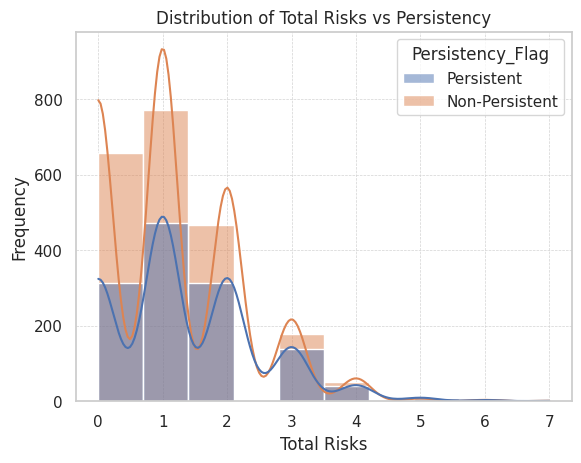

In [110]:
# Count of risks grouped by Persistency Flag
risk_cols = [col for col in nominal_cols if 'Risk' in col]
viz_df['Total_Risks'] = viz_df[risk_cols].sum(axis=1)

# Plot the distribution of risks
sns.histplot(data=viz_df, x='Total_Risks', hue='Persistency_Flag', kde=True, bins=10)
plt.title("Distribution of Total Risks vs Persistency")
plt.xlabel("Total Risks")
plt.ylabel("Frequency")
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='both')
plt.show()


**Key Observations:**

* Most patients, regardless of persistency, have Total Risks between 0 and 2.
* At lower risk levels (0–1), the frequency of Non-Persistent patients is noticeably higher compared to Persistent patients.
* Persistent patients' distribution decreases sharply after risk level 2, while Non-Persistent patients have a longer tail extending to higher risk levels (3–7).

**Hypotheses for Analysis**
* **Low Total Risks (0–1):**

* Patients with lower risk levels are more likely to adhere to treatment due to fewer complications or barriers (e.g., side effects, complexity of the treatment regimen).
* However, the higher frequency of Non-Persistent patients at these levels suggests that some other factors, such as behavioral or socioeconomic barriers, might impact adherence.

* **Moderate Total Risks (2–3):**

* As risks increase, persistent patients become less frequent, possibly due to increasing treatment complexity, higher side effects, or diminishing confidence in the effectiveness of the treatment.

* **High Total Risks (4–7):**

* Patients with very high risks are predominantly Non-Persistent, which could be due to the overwhelming severity of their conditions, inability to manage complex regimens, or lack of follow-up support.

**Pairplot for Glucose and Risk-Related Features:**
Visualize interactions between glucose records, risk segments, and persistency.

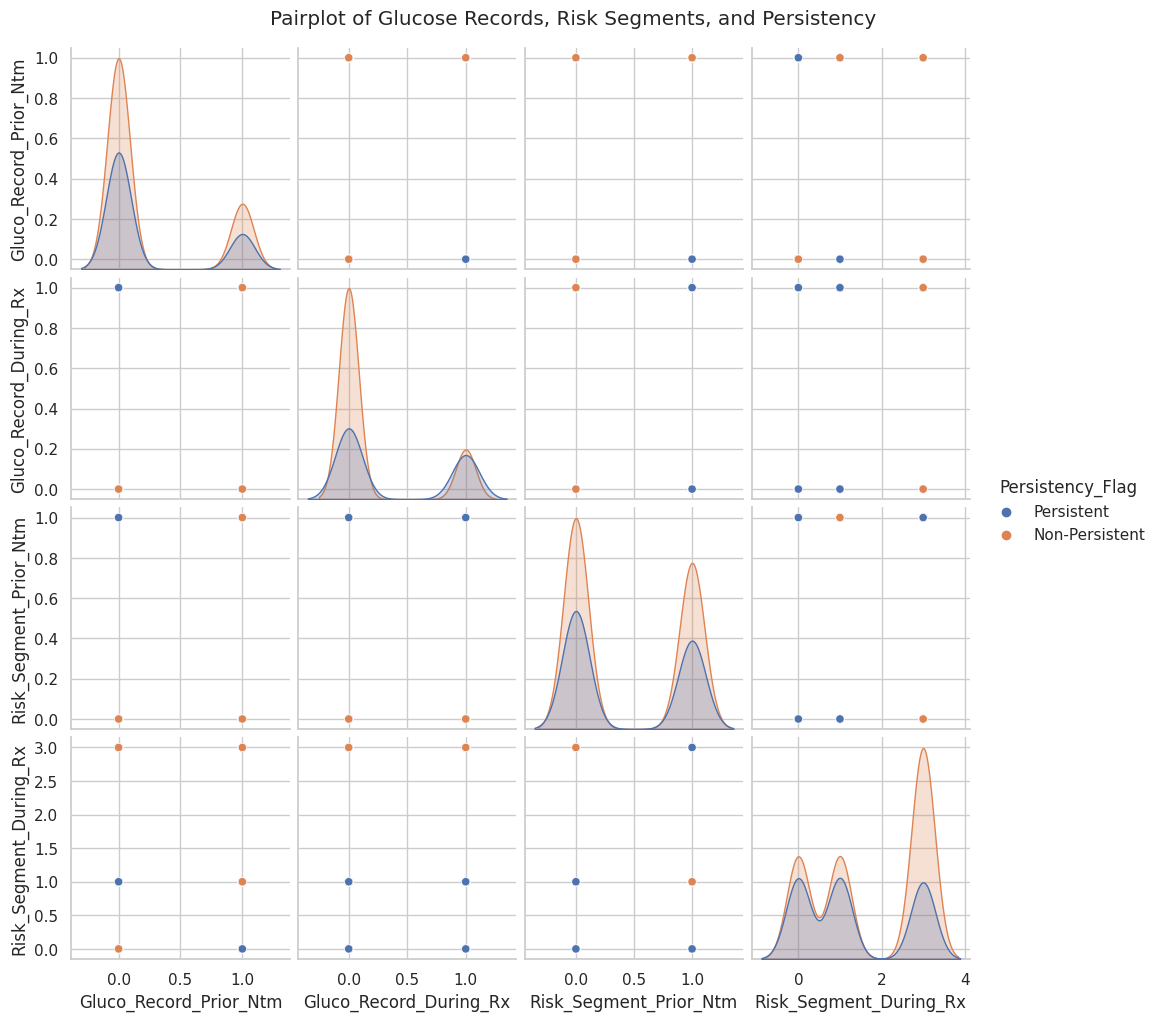

In [111]:
important_cols = ['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 
                  'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx', 'Persistency_Flag']

sns.pairplot(viz_df[important_cols], hue='Persistency_Flag', diag_kind='kde')     

plt.suptitle("Pairplot of Glucose Records, Risk Segments, and Persistency", y=1.02)
plt.show()

**1.Glucose Record Prior to Treatment vs. Glucose Record During Treatment:**

* Persistent patients tend to have a higher frequency of glucose records both before and during treatment (green dots are clustered near the top).
* Non-persistent patients (orange dots) seem to have a broader range of glucose records, with some showing lower records prior to treatment but higher during treatment, suggesting a different behavior in monitoring and treatment adherence.

**2.Glucose Record Prior to Treatment vs. Risk Segment Prior to Treatment:**

* There seems to be a minimal overlap or correlation between the glucose records prior to treatment and the risk segments for both persistent and non-persistent groups.
* Persistent patients have low values for Risk_Segment_Prior_Ntm, whereas non-persistent patients exhibit a wider spread in their risk segment classification, potentially indicating that higher risk might be related to poorer persistency.

**3.Risk Segment During Treatment vs. Glucose Record During Treatment:**

* Non-persistent patients are more scattered across various glucose record values during treatment, especially in the higher risk segment (3 and 4) categories.
* Persistent patients are mostly in the lower risk segments, suggesting that lower risk may correlate with better adherence to treatment and glucose monitoring.

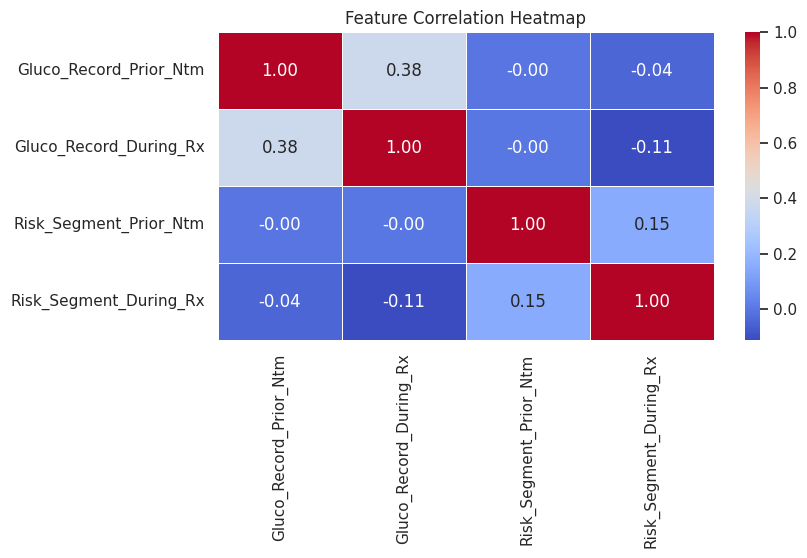

In [112]:
# Compute correlation matrix
correlation = viz_df[['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 
                    'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']].corr()

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



**1. Positive Correlation Between Gluco_Record_Prior_Ntm and Gluco_Record_During_Rx (0.38):**
* There is a moderate positive correlation between glucose records prior to and during treatment.
* **Hypothesis:** Patients who had glucose monitoring prior to treatment are likely to continue monitoring during treatment.


**2. Weak Negative Correlations with Risk Segments:**

* **Gluco_Record_During_Rx vs Risk_Segment_During_Rx (-0.11):**
    * Indicates a slight negative correlation—as glucose records increase during treatment, the risk segment decreases slightly.
    * **Hypothesis:** Improved glucose monitoring during treatment may contribute to better risk management (lower risk).

* **Gluco_Record_Prior_Ntm vs Risk_Segment_During_Rx (-0.04):**
    * This weak relationship suggests that prior glucose records have minimal influence on the risk segment during treatment.

**3. Positive Correlation Between Risk_Segment_Prior_Ntm and Risk_Segment_During_Rx (0.15):**
* There is a small positive correlation between the risk segments prior to and during treatment.
* **Hypothesis:** Patients with a higher risk before treatment may continue to show elevated risk during treatment, indicating some persistence of risk level over time.

**4.Near-Zero Correlations:**
* The correlations between Gluco_Record_Prior_Ntm and risk segments are almost zero (close to -0.00).
* This indicates no linear relationship between glucose monitoring before treatment and the risk levels.


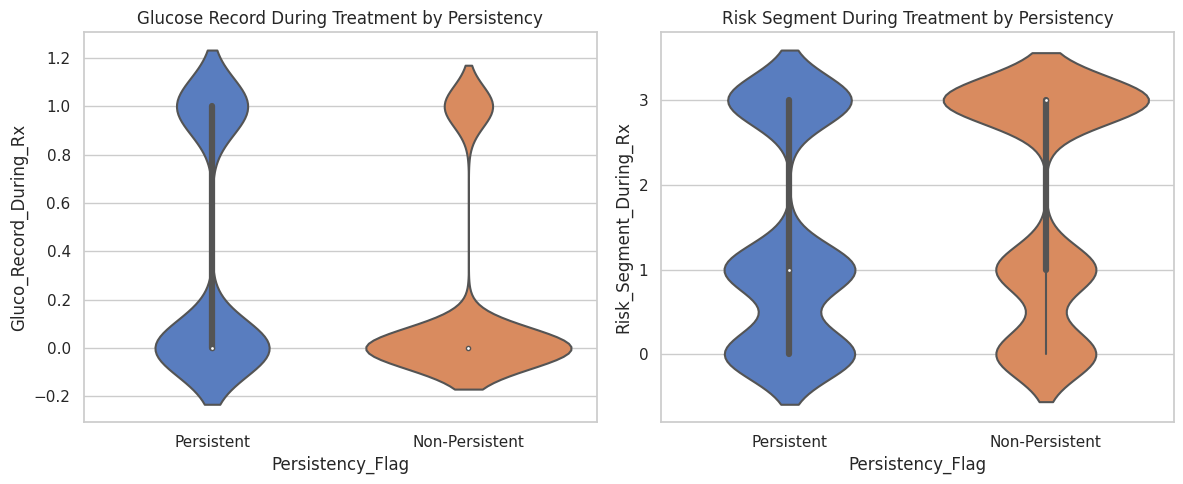

In [113]:
# Set figure size and create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Violin plot for glucose records during treatment
sns.violinplot(x='Persistency_Flag',y='Gluco_Record_During_Rx',data=viz_df,palette='muted',ax=axes[0])
axes[0].set_title('Glucose Record During Treatment by Persistency')

# Violin plot for risk segments during treatment
sns.violinplot(x='Persistency_Flag',y='Risk_Segment_During_Rx',data=viz_df,palette='muted',ax=axes[1])
axes[1].set_title('Risk Segment During Treatment by Persistency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Glucose Record During Treatment by Persistency**
* For Persistent patients (left violin plot), glucose records are concentrated at higher values, suggesting better or more frequent glucose monitoring during treatment.
* For Non-Persistent patients (right violin plot), glucose records show a lower concentration overall, indicating less frequent monitoring.
* There is a clear difference in distribution, with Persistent patients exhibiting higher and more diverse glucose records, while Non-Persistent patients have a narrow, low-range distribution.

**Hypothesis:**
* Patients with better glucose record monitoring during treatment may exhibit better persistency (continuation with treatment).
* Lack of frequent glucose monitoring might contribute to lower treatment persistency.

**Risk Segment During Treatment by Persistency**
* For Persistent patients, the risk segment is bimodal (two peaks). The peaks occur at:
  * Low risk (0): A significant proportion of Persistent patients are in the low-risk category.
  * Moderate to higher risk (2–3): Some Persistent patients fall into higher-risk categories as well.
* For Non-Persistent patients, the distribution also shows bimodality, but the higher risk segment (3) appears to dominate. The lower risk group (0) is less concentrated than in Persistent patients.

**Hypothesis:**
* Patients in lower risk categories during treatment may exhibit better persistency because they might experience fewer health complications or issues.
* Patients in higher risk segments may drop out of treatment (Non-Persistent) due to difficulty managing their condition.

**Analysis of the Bar Plot: Average Values of Glucose and Risk Features by Persistency**
The chart presents average values for four features (Gluco_Record_Prior_Ntm, Gluco_Record_During_Rx, Risk_Segment_Prior_Ntm, and Risk_Segment_During_Rx) grouped by two categories of persistency: Persistent (green bars) and Non-Persistent (orange bars). Error bars indicate the variability (likely standard deviation) around the mean for each feature within each group.



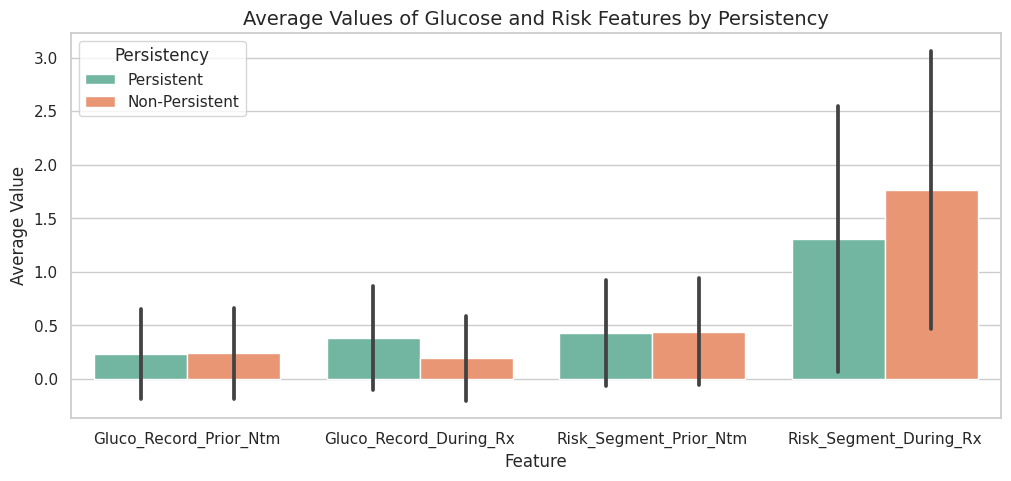

In [114]:
# Melt data for easier grouped bar plotting
melted_df = viz_df.melt(id_vars=['Persistency_Flag'], 
                        value_vars=['Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 
                                    'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx'], 
                        var_name="Feature", 
                        value_name="Value")

plt.figure(figsize=(12, 5))
sns.barplot(data=melted_df, x="Feature", y="Value", hue="Persistency_Flag", ci="sd", palette="Set2")
plt.title("Average Values of Glucose and Risk Features by Persistency", fontsize=14)
plt.xlabel("Feature")
plt.ylabel("Average Value")
plt.legend(title="Persistency")
plt.show()


**Gluco_Record_Prior_Ntm:**
* Both Persistent and Non-Persistent groups show similar average values.
* Error bars overlap significantly, indicating no clear distinction between groups.
* 
**Hypothesis:** Glucose records before treatment initiation do not have a significant impact on medication persistency.

**Gluco_Record_During_Rx:**
* Similar to Gluco_Record_Prior_Ntm, the average values for Persistent and Non-Persistent are nearly identical, with overlapping error bars.

**Hypothesis:** Monitoring glucose levels during the treatment might not influence whether a patient remains persistent with their medication.

**Risk_Segment_Prior_Ntm:**
* Slightly higher average value for the Persistent group compared to the Non-Persistent group.
* Error bars still overlap but suggest a weak relationship.

**Hypothesis:** Patients identified with higher risk segments prior to treatment initiation may be slightly more likely to adhere to medications, as they might be more motivated to manage their health.

**Risk_Segment_During_Rx:**
* Clear difference between groups: the Persistent group has a lower average value compared to the Non-Persistent group.
* Error bars do not completely overlap, suggesting a significant difference.

**Hypothesis:** Patients who are classified as lower risk during treatment are more likely to adhere to their medication, possibly due to effective health management and reduced barriers to adherence.


# Feature Selection:
* Feature selection is the process of choosing the most relevant features for the model and removing irrelevant or redundant features.
* It helps in reducing model complexity, improving performance, and preventing overfitting.

**Types of Feature Selection:**
* **Filter Methods:** Evaluate the importance of each feature individually (e.g., correlation, chi-square test).
* **Wrapper Methods:** Use machine learning models to evaluate feature importance (e.g., Recursive Feature Elimination).
* **Embedded Methods:** Feature selection is performed during the training process (e.g., Lasso, Decision Trees). 

**1. Filter Methods:** Filter methods evaluate the statistical relationship between features and the target variable. Features that are weakly correlated or irrelevant are removed before training the model.

**Common Techniques**
* Correlation Matrix (for numerical features)
* Chi-Square Test (for categorical features)
* Variance Threshold (removes features with low variance)


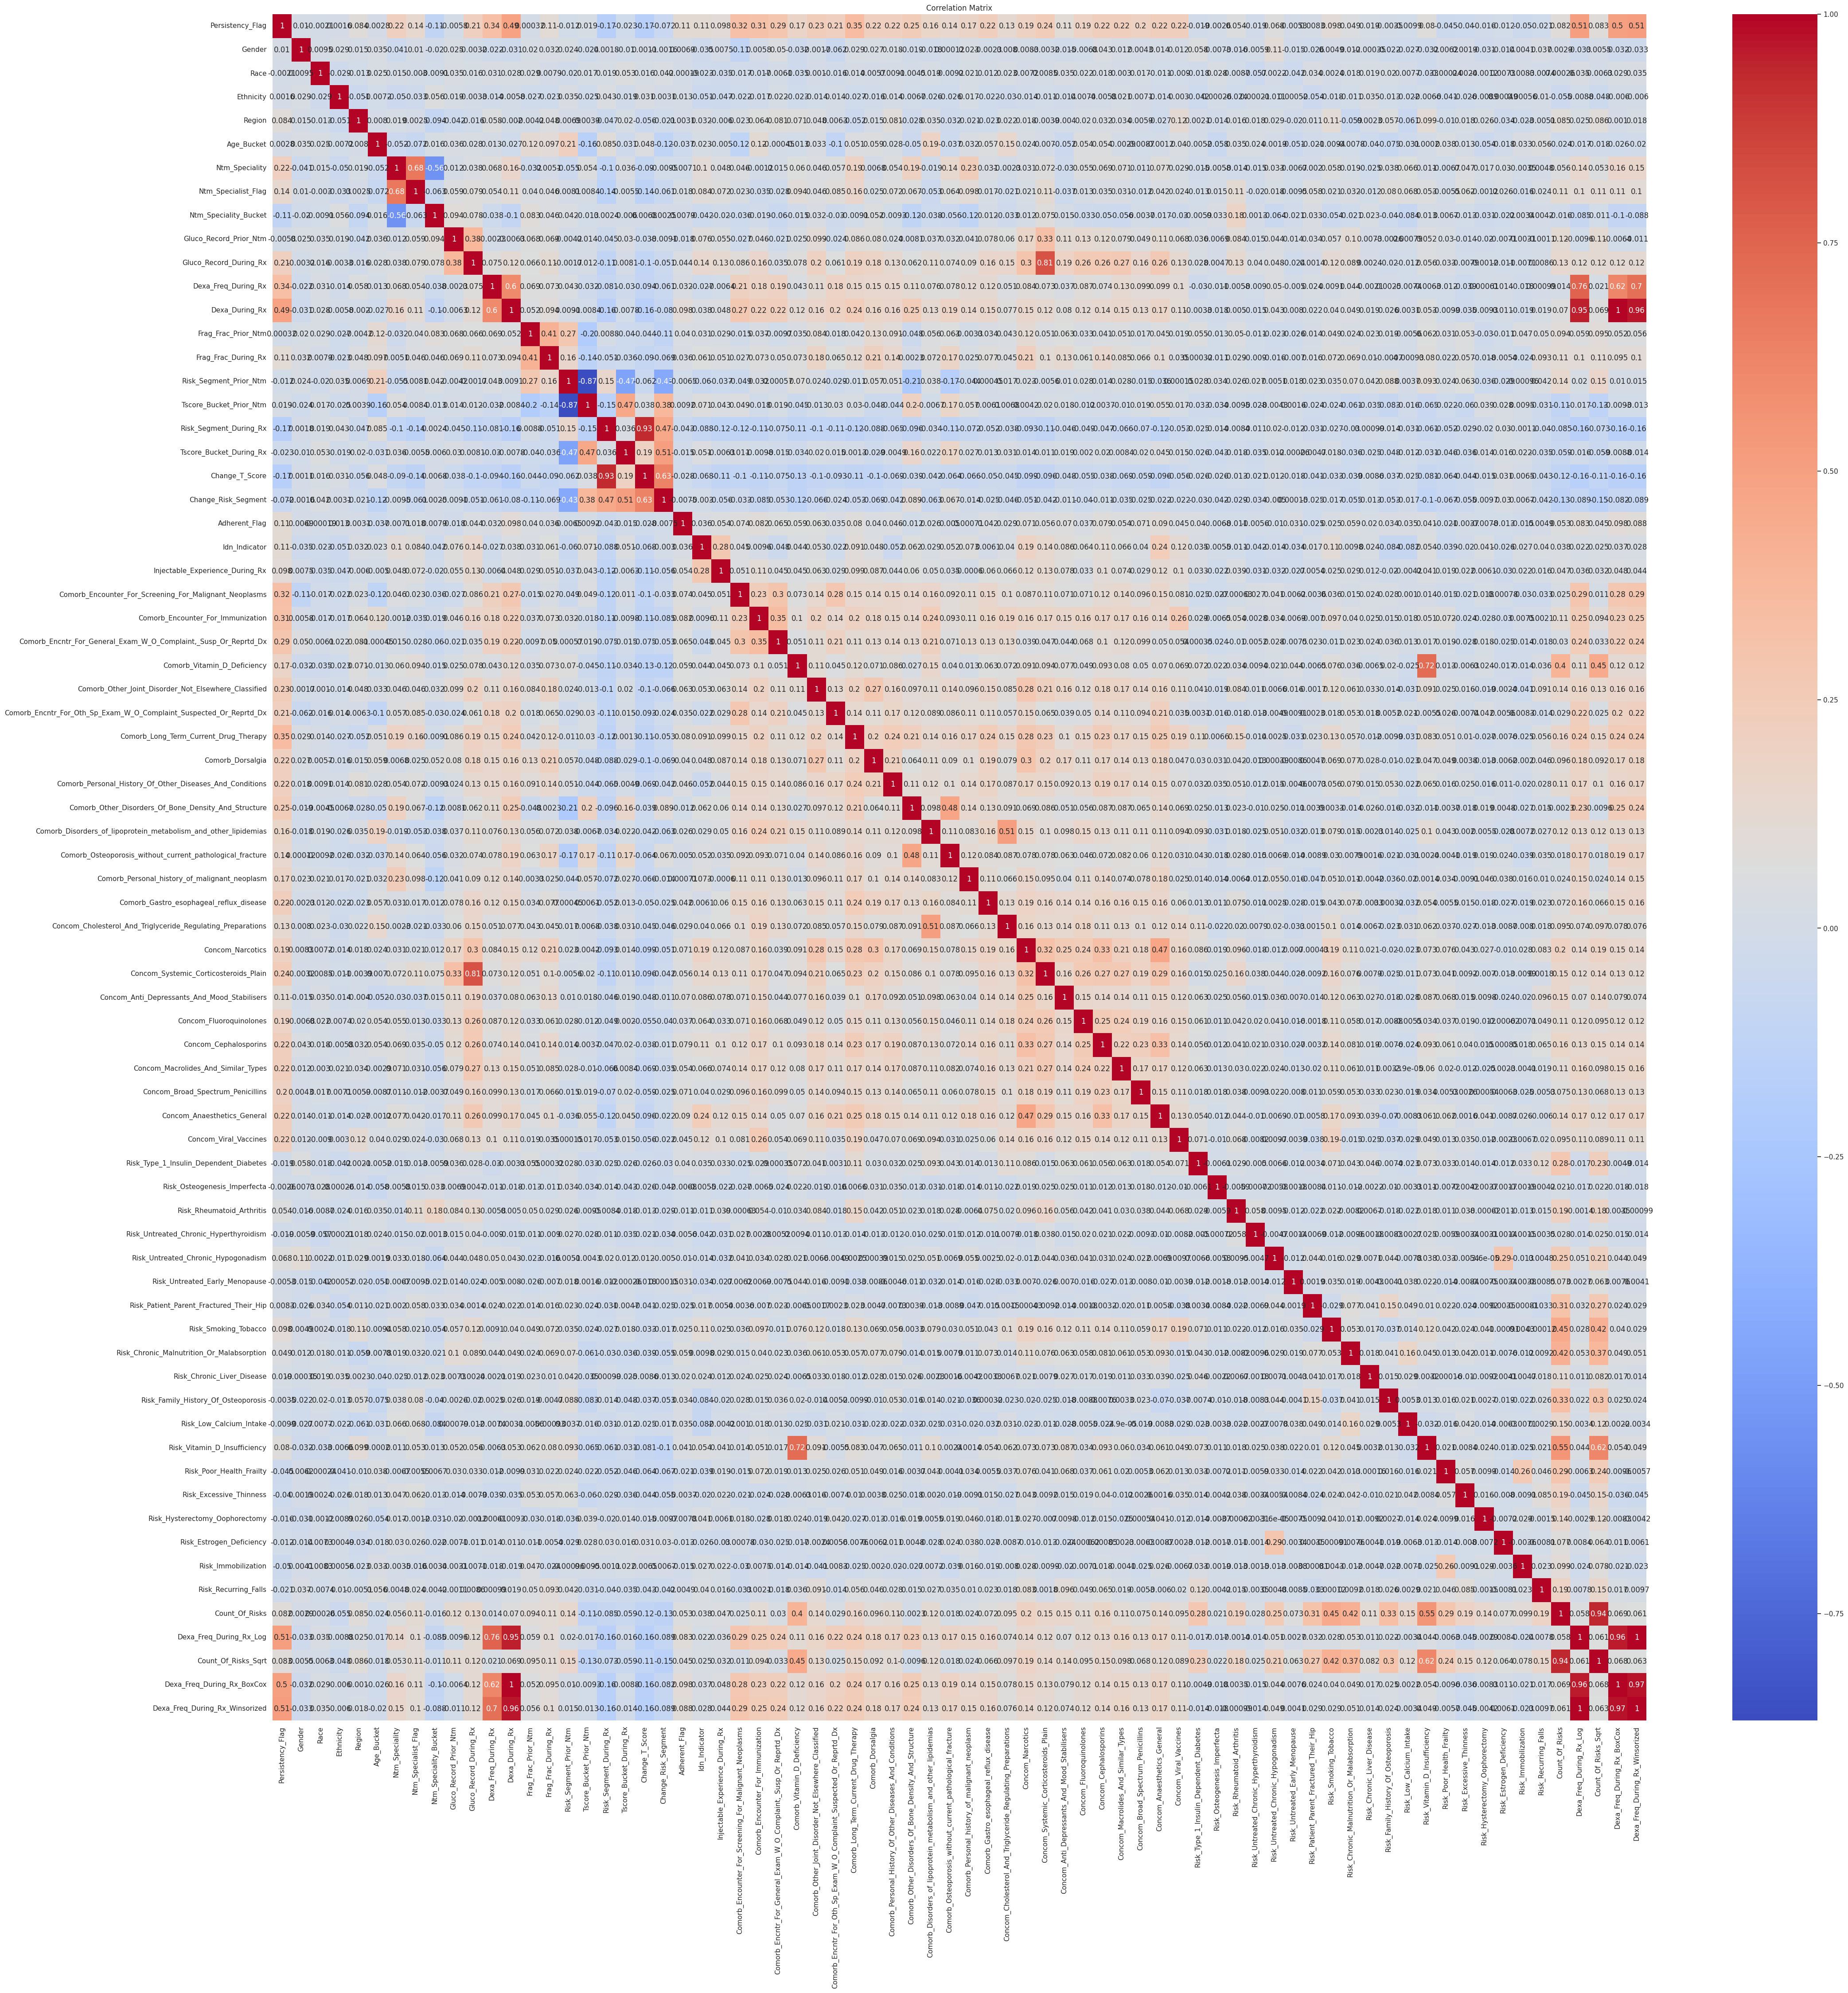

Highly correlated features to drop: {'Dexa_Freq_During_Rx_BoxCox', 'Change_T_Score', 'Concom_Systemic_Corticosteroids_Plain', 'Tscore_Bucket_Prior_Ntm', 'Count_Of_Risks_Sqrt', 'Dexa_Freq_During_Rx_Log', 'Dexa_Freq_During_Rx_Winsorized'}


In [115]:
#Correlation Matrix:Use Case: Works well for numerical data where correlations help identify redundant features.

df1 = df.copy()
# Compute the correlation matrix
corr_matrix = df1.corr()

# Plot the heatmap for visual analysis
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Find features with high correlation (> 0.8)
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  
            col_name = corr_matrix.columns[i]
            high_corr_features.add(col_name)

print("Highly correlated features to drop:", high_corr_features)

# Drop highly correlated features
df_filtered = df1.drop(columns=high_corr_features)


**Variance Threshold:** Use Case: Remove features with low variance (constant or near-constant features).
* VarianceThreshold removes features where the variance is below a certain threshold.
* This is useful for identifying constant or near-constant features that don't contribute to the model.


In [116]:
from sklearn.feature_selection import VarianceThreshold

df2= df1.copy()

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(threshold=0.01)  # 1% variance threshold

# Apply the selector to the data
X = df2.drop('Persistency_Flag', axis=1)  # Drop the target column
X_new = selector.fit_transform(X)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket',
       'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Oth

**2. Wrapper Methods**
Wrapper methods train a model and evaluate the performance using subsets of features. These methods are computationally expensive but provide accurate results.

**Common Techniques**
* Forward Selection
* Backward Elimination
* Recursive Feature Elimination (RFE)

**Recursive Feature Elimination (RFE)**
Use Case: Select features based on model performance (e.g., using Random Forest or Logistic Regression).
* RFE works by recursively eliminating the least important features.
* You can specify the number of features to keep (n_features_to_select).
* The estimator (e.g., RandomForestClassifier) determines feature importance.

In [117]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
X = df1.drop('Persistency_Flag', axis=1)  # Features
y = df1['Persistency_Flag']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Use RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=30)  
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features)


Selected features using RFE: Index(['Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Speciality_Bucket',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Tscore_Bucket_Prior_Ntm',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Long_Term_Current_Drug_Therapy',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Fluoroquinolones', 'Concom_Vira

# Feature Importance from Tree-Based Models
* Feature Importance from Random Forest
* Random Forest assigns importance scores to features during training.

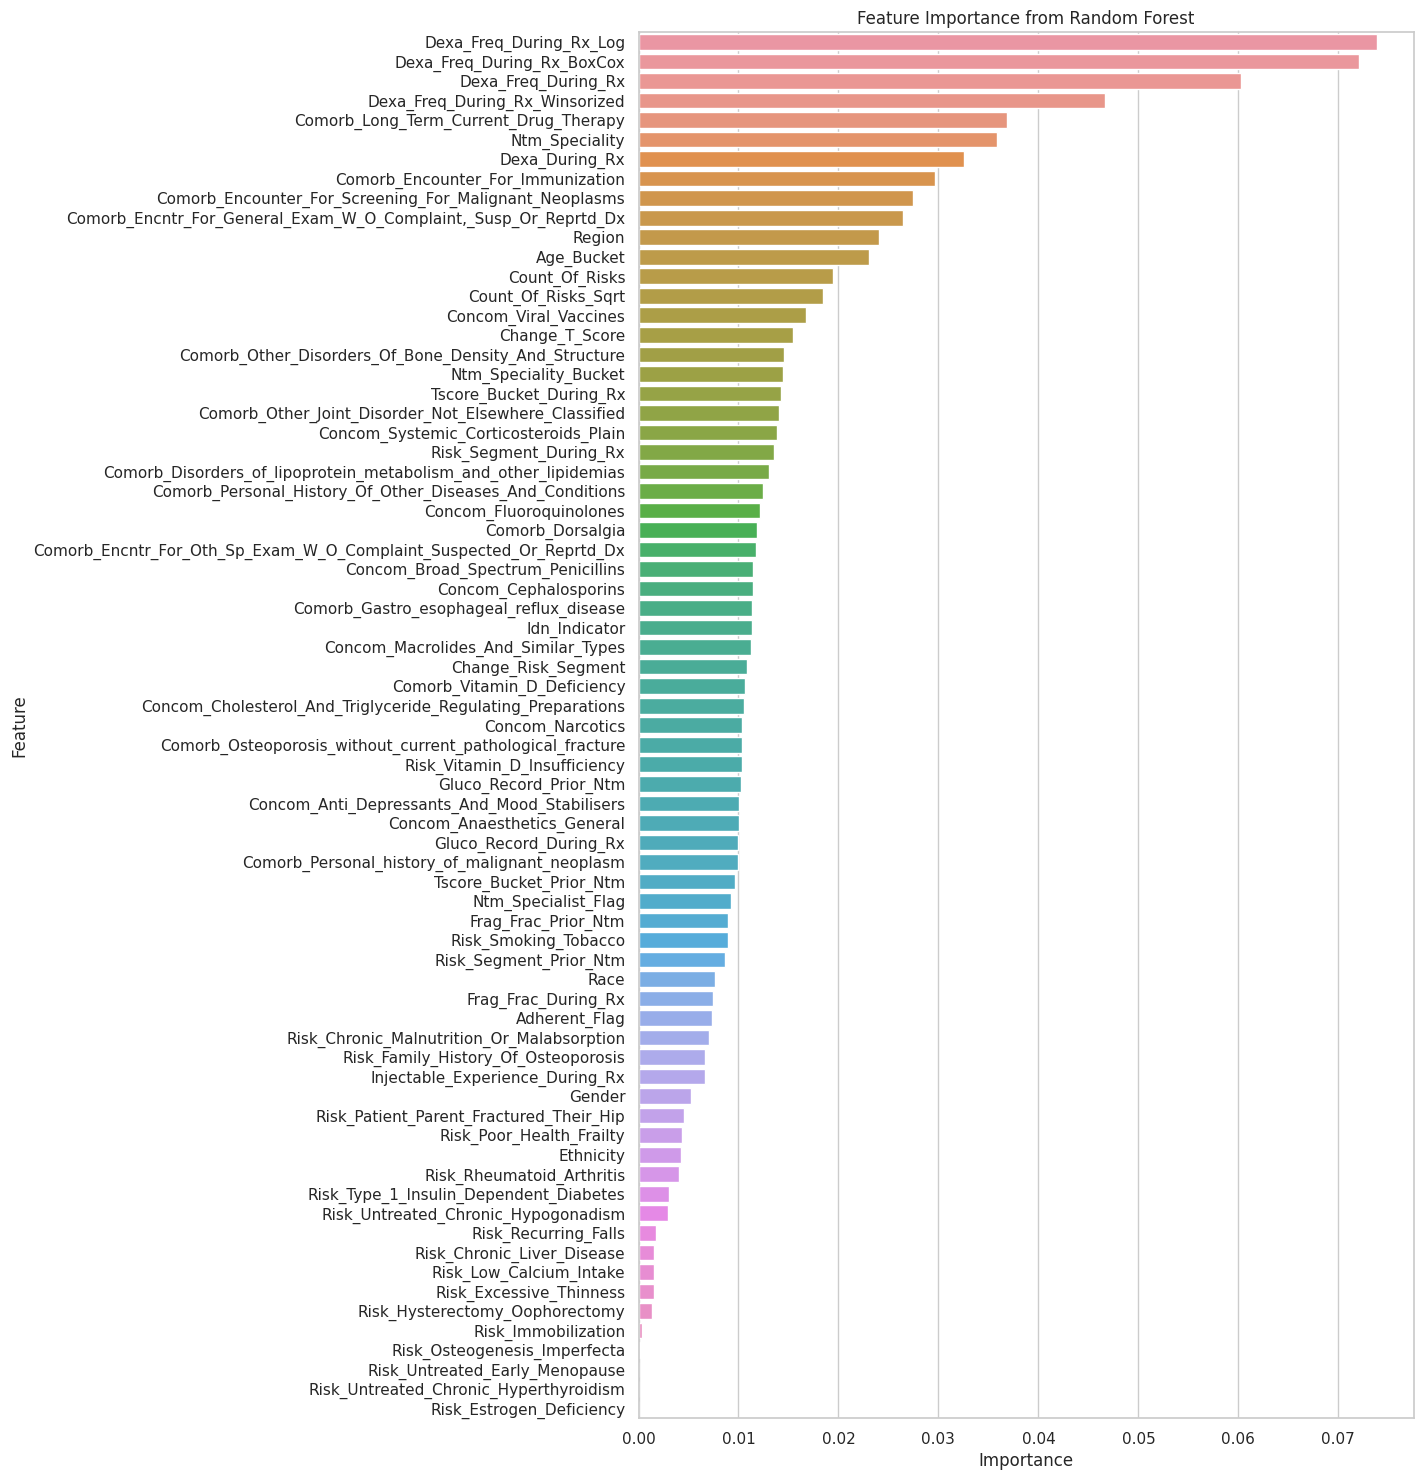

In [118]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Initialize Logistic Regression with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

# Train the model
model.fit(X_train, y_train)

# Select important features
selector = SelectFromModel(model, prefit=True)
X_new = selector.transform(X_train)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features using LASSO:", selected_features)


Selected features using LASSO: Index(['Race', 'Region', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Frag_Frac_Prior_Ntm', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_dise

# Model Recommendations for Persistency Prediction
To predict drug persistency and understand adherence patterns, selecting the right models is critical. Here, I’ll provide detailed recommendations for classification models suitable for this task, explaining each model's strengths, use cases, and steps to implement them effectively.

**Why Classification Models?**
Persistency Prediction is a binary classification problem:
Persistent (1)
Non-Persistent (0)
A classification model determines the probability of a patient being persistent or non-persistent based on input features (e.g., glucose records, risk segments, demographics, etc.).

**1. Logistic Regression:**
Logistic Regression is a linear model that predicts the probability of a binary outcome.
It works well when the relationship between predictors and target is approximately linear.

**Why Use It?**

* Simple and interpretable model.
* Provides probability scores for classification.
* Easy to implement and explain to stakeholders.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop(columns=['Persistency_Flag'])  # Features
y = df['Persistency_Flag']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       431
           1       0.76      0.69      0.72       254

    accuracy                           0.80       685
   macro avg       0.79      0.78      0.79       685
weighted avg       0.80      0.80      0.80       685



**2. Random Forest**
* Random Forest is an ensemble model that builds multiple decision trees and combines their results.
* It reduces overfitting and provides feature importance scores.

**Why Use It?**

* Handles non-linear relationships well.
* Robust to outliers and missing data.
* Provides feature importance to understand which features drive persistency.

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       431
           1       0.77      0.66      0.71       254

    accuracy                           0.80       685
   macro avg       0.79      0.77      0.78       685
weighted avg       0.80      0.80      0.80       685



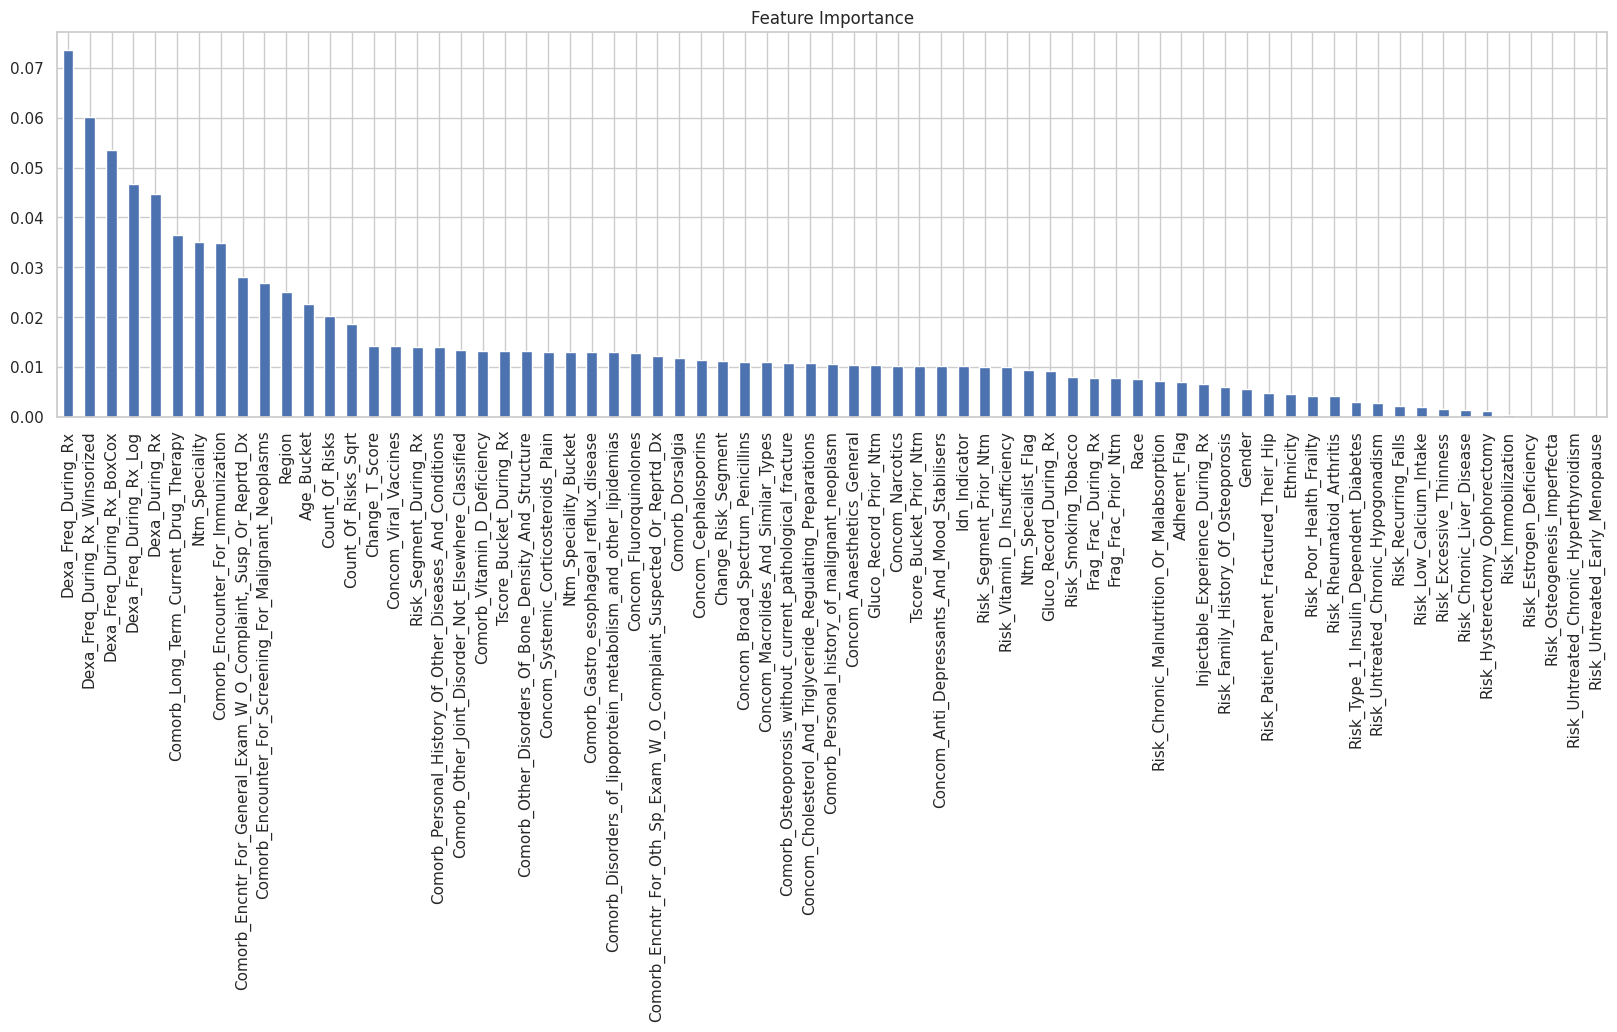

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20, 5))
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title="Feature Importance")
plt.show()


**3. Gradient Boosting (XGBoost and LightGBM)**
* Boosting algorithms like XGBoost and LightGBM are powerful ensemble models.
* They iteratively improve weak learners (shallow decision trees) to produce a strong model.

**Why Use It?**
* Handles imbalanced data effectively (common in persistency problems).
* Faster and more accurate for large datasets.
* Can fine-tune hyperparameters for better performance.

In [122]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       431
           1       0.76      0.70      0.73       254

    accuracy                           0.81       685
   macro avg       0.79      0.79      0.79       685
weighted avg       0.80      0.81      0.80       685



**4. Support Vector Machines (SVM)**
* SVM is a non-linear model that separates classes using a hyperplane.
* It works well for datasets with small to medium size.

**Why Use It?**
* Effective when the relationship between features and target is complex.
* Handles non-linear decision boundaries using kernel tricks.

In [123]:
from sklearn.svm import SVC

# Train SVM Classifier
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.85       431
           1       0.79      0.60      0.68       254

    accuracy                           0.79       685
   macro avg       0.79      0.75      0.76       685
weighted avg       0.79      0.79      0.78       685



**5. Neural Networks**
* Neural Networks can capture complex relationships in the data using multiple hidden layers.
* Suitable for large and intricate datasets.

**Why Use It?**
* Can model non-linear and complex patterns effectively.
* Useful when classical methods fail to deliver optimal results.

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Neural Network architecture
model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)


Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7115 - loss: 0.5755 - val_accuracy: 0.8066 - val_loss: 0.4484
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8118 - loss: 0.4397 - val_accuracy: 0.7993 - val_loss: 0.4171
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - loss: 0.4023 - val_accuracy: 0.7847 - val_loss: 0.4193
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8203 - loss: 0.3994 - val_accuracy: 0.8212 - val_loss: 0.4009
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8335 - loss: 0.3814 - val_accuracy: 0.8139 - val_loss: 0.3834
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.3962 - val_accuracy: 0.8175 - val_loss: 0.4064
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.3534 - val_accuracy: 0.8285 - val_loss: 0.4052
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.3756 - val_accuracy: 0.8175 - val_loss:

# Evaluation Metrics to Assess Classification Models
Evaluating a model is critical to understanding its performance. For binary classification tasks like Persistency Prediction, the following metrics are widely used:
* Accuracy
* Precision
* Recall (Sensitivity)
* F1-Score
* ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)
Here’s a detailed explanation of each metric, including Python code to calculate and display them.

**1.Accuracy**
Accuracy measures the proportion of correctly predicted instances (both Persistent and Non-Persistent) out of the total number of predictions.

Accuracy=((True Positives (TP))+(True Negatives (TN)))/ Total Predictions

**When to Use**
* Use when classes are balanced.
* Not ideal for imbalanced datasets because it can mislead results.

**2. Precision**
Precision measures the proportion of positive predictions that are actually correct. It answers the question: Of all the patients predicted to be persistent, how many actually are persistent?

Precision=(True Positives (TP))/((True Positives (TP))+(False Positives (FP)))

**When to Use:**
Use when false positives are more critical (e.g., predicting persistency when it’s not true).
  
**3. Recall (Sensitivity or True Positive Rate)**
Recall measures the proportion of actual positives that are correctly predicted. It answers: Of all actual persistent patients, how many were predicted correctly?

Recall=(True Positives (TP))/((True Positives (TP))+(False Negatives (FN)))

**When to Use:**
Use when false negatives are more critical (e.g., missing patients who are truly persistent).

**4. F1-Score**
The F1-Score is the harmonic mean of Precision and Recall. It balances both metrics into a single score.

F1-Score= 2×((Precision×Recall)/(Precision+Recall))
 
**When to Use:**
Use when you want a balance between Precision and Recall.

**5. ROC-AUC Score (Receiver Operating Characteristic - Area Under Curve**)
* ROC-AUC evaluates the model's ability to distinguish between classes at different thresholds.
* ROC Curve: Plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity).
* AUC Score: Measures the area under the ROC curve. The closer to 1.0, the better the model's performance.

**When to Use:**
Use for a holistic view of model performance, especially for imbalanced datasets.


In [125]:
# Import Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# For binary classification models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Using a dataset with target 'Persistency'
X = df.drop(columns=['Persistency_Flag'])  # Features
y = df['Persistency_Flag']  # Target variable

# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier (can replace with other models)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


**Calculate and Display Metrics**

**1. Accuracy, Precision, Recall, and F1-Score**

In [126]:
# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Full Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8
Precision: 0.7671232876712328
Recall: 0.6614173228346457
F1-Score: 0.7103594080338266
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       431
           1       0.77      0.66      0.71       254

    accuracy                           0.80       685
   macro avg       0.79      0.77      0.78       685
weighted avg       0.80      0.80      0.80       685



**2. Confusion Matrix**

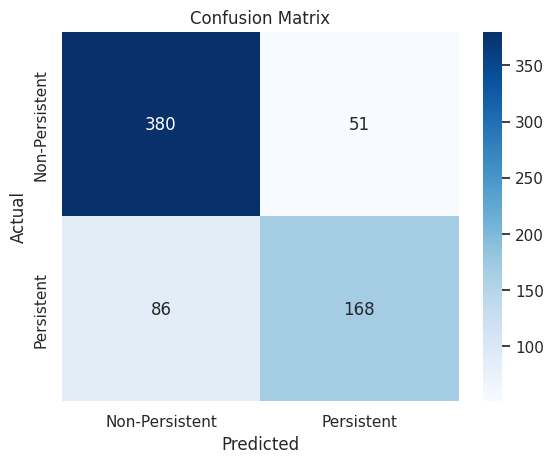

In [127]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Persistent', 'Persistent'], yticklabels=['Non-Persistent', 'Persistent'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**3. ROC Curve and AUC Score**

ROC-AUC Score: 0.8690510988910609


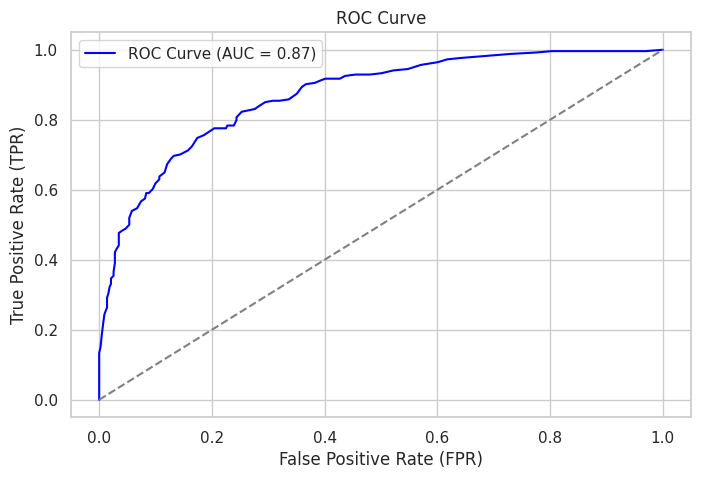

In [128]:
# Calculate ROC-AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


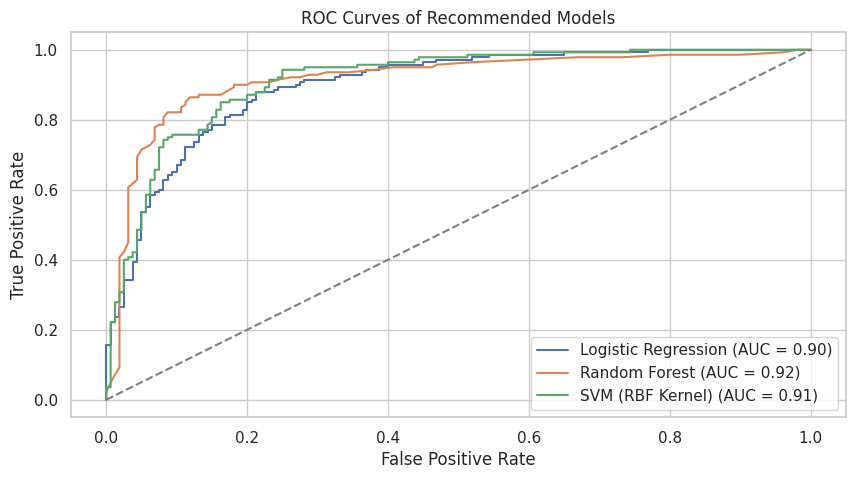

In [136]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate sample data for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=65, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train multiple models and store them in a dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42)
}

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)

# Plot ROC Curves
plt.figure(figsize=(10, 5))
for name, model in models.items():
    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Calculate FPR (False Positive Rate) and TPR (True Positive Rate)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Recommended Models")
plt.legend()
plt.show()
